### Estudiante: Samir Cabrera DS_ONLINE_25

# Proyecto 2: Análisis de mercado inmobiliario (Exploración)

Analisis exploratorio inicial del set de datos. 



Importa las librerías necesarias para trabajar en la consigna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias

In [2]:
df = pd.read_csv('F:\DATA SCIENCE\PROYECTO_1\DS_Proyecto_01_Datos_Properati.csv')


¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?

In [3]:
#Dimensiones del Dataframe
df.shape

(146660, 19)

In [4]:
#Columnas del Dataframe
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
#5 primeras instancias del DataFrame
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [6]:
#Agrego una columna hash del title para poder recuperar valores iniciales más adelante desde el dataframe principal df
df['unique_id'] = df.title.map(hash)

In [7]:
#Formatear fechas
df['start_date']= pd.to_datetime(df['start_date'],errors = 'coerce')
df['end_date']= pd.to_datetime(df['end_date'],errors = 'coerce')
df['created_on']= pd.to_datetime(df['created_on'],errors = 'coerce')

In [8]:
#Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       146660 non-null  datetime64[ns]
 1   end_date         121559 non-null  datetime64[ns]
 2   created_on       146660 non-null  datetime64[ns]
 3   lat              136735 non-null  float64       
 4   lon              136701 non-null  float64       
 5   l1               146660 non-null  object        
 6   l2               146660 non-null  object        
 7   l3               146660 non-null  object        
 8   rooms            146660 non-null  float64       
 9   bedrooms         146660 non-null  float64       
 10  bathrooms        140703 non-null  float64       
 11  surface_total    126133 non-null  float64       
 12  surface_covered  125046 non-null  float64       
 13  price            146660 non-null  float64       
 14  currency         146

In [9]:
#Estadistica de las columnas
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,unique_id
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05,2.908664e+17
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05,5.316940e+18
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,-9.223221e+18
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05,-4.297969e+18
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,6.298536e+17
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05,4.822527e+18
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07,9.222914e+18


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [10]:
# Tasa de valores faltantes por columnas del DataFrame
df.isna().sum(axis=0)/len(df)

start_date         0.000000
end_date           0.171151
created_on         0.000000
lat                0.067674
lon                0.067905
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.040618
surface_total      0.139963
surface_covered    0.147375
price              0.000000
currency           0.000000
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
unique_id          0.000000
dtype: float64

In [11]:
df_group_regions = df.groupby('l2', as_index = False)[['title']].count()
df_group_regions = df_group_regions.sort_values(['title'],ascending=False).reset_index(drop=True)

In [12]:
df_group_types = df.groupby('property_type', as_index = False)[['title']].count()
df_group_types = df_group_types.sort_values(['title'],ascending=False).reset_index(drop=True)
df_v0=  df[df.property_type.isin(df_group_types['property_type'].head(3)) & df.l2.isin(df_group_regions['l2'].head(1))]
df_v0.shape

(91485, 20)

Para esta ocasión trabajaré con el mismo set de datos que en el proyecto uno para tener una más clara comparación de resultados frente a los dos proyectos.

# Proyecto 2: Análisis de mercado inmobiliario (Herramientas avanzadas)

El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

### Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

    Detección y eliminación de Outliers

    Encoding

    Imputación de valores faltantes

    Escalado de datos

    Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

    Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

#### Analisis de valores faltantes

La probabilidad de tener un dato faltante, P(missing) , es la misma para todas las instancias y no depende de las medidas de la variable de interés que estemos estudiando u otras variables. 

In [13]:
df_v1 = df_v0.copy()

In [14]:
df_v1.shape

(91485, 20)

In [15]:
# Tasa de valores faltantes por columnas del DataFrame
df_v1.isna().sum(axis=0) /len(df_v1)

start_date         0.000000
end_date           0.120085
created_on         0.000000
lat                0.049560
lon                0.049713
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.023731
surface_total      0.097470
surface_covered    0.100946
price              0.000000
currency           0.000000
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
unique_id          0.000000
dtype: float64

Observamos que surface_total y surface_covered tiene un porcentaje aunque bajo de valores faltantes. Sin embargo dado a que son nuestras principales variables vamos a hacer tratamiento de datos faltantes para estas dos variables. 

El que estas variables tengan valores faltantes es un tema netamente al azar debido a que siendo estas una de las variables mas importantes de nuestro data set no hay razón a simple vista para que esten sin valor, ademas que la probabilidad de que estén nulas es la misma que para las otras variables del data set, una tema netamente al azar. Por lo anterior considero que son valores faltantes MCAR, dado a que la probabilidad de tener un dato faltante, P(missing) , es la misma para todas las instancias y no depende de las medidas de la variable de interés que estemos estudiando u otras variables. 

Teniendo en cuenta lo anterior un buen manejo podría ser imputando valor promedio pero teniendo en cuenta el tipo de propiedad.

In [16]:
from numpy import nan
from numpy import isnan

In [17]:
#df_v1 = df_v1.dropna(axis=0,how='any')

A fin de completar valores nulos de superficie con valores lo más cercanos a la realidad usaré la superficie total en los casos en los que no tenga la superficie cubierta y la superficie cubierta la asignaré a la total en los casos en los cuales no tenga esta última.

In [18]:
df_v1[(((~df_v1["surface_total"].notnull() ) & (df_v1["surface_covered"].notnull()) ) | (df_v1["surface_total"].notnull() ) & (~df_v1["surface_covered"].notnull()) )]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,unique_id
722,2019-04-25,2019-06-23,2019-04-25,-34.577620,-58.465122,Argentina,Capital Federal,Colegiales,2.0,1.0,1.0,35.0,NaN,89000.0,USD,DEPARTAMENTO 2 AMB. IDEAL INVERSOR/PRIMERA VIV...,Departamento de 2 ambientes. EXPENSAS BAJASLiv...,Departamento,Venta,1929201985454771476
913,2019-04-25,2019-10-08,2019-04-25,-34.598850,-58.364006,Argentina,Capital Federal,Puerto Madero,3.0,2.0,3.0,165.0,NaN,690000.0,USD,Venta Departamento en Puerto Madero Capital Fe...,"Departamento en Venta, , con una superficie t...",Departamento,Venta,-5322624121778760177
2506,2019-09-21,2019-12-23,2019-09-21,NaN,NaN,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,NaN,1.0,236000.0,USD,3 Ambientes a estrenar c/ cochera y parrilla e...,Moderno departamento de 3 ambientes a estrenar...,Departamento,Venta,6665887681471745835
3172,2019-08-18,2019-10-10,2019-08-18,-34.614152,-58.465822,Argentina,Capital Federal,Villa General Mitre,4.0,3.0,1.0,NaN,75.0,210000.0,USD,Villa Gral. Mitre*TODO LUZ*3 Dormitorios Cochera,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta,-6991412756851166151
4082,2019-01-31,2019-05-07,2019-01-31,-34.633890,-58.489153,Argentina,Capital Federal,Floresta,3.0,2.0,1.0,NaN,65.0,124000.0,USD,3 AMBIENTES AL FRENTE CON BALCON,"DEPARTAMENTO PISO 3° AL FRENTE, 2 DORMITORIOS ...",Departamento,Venta,3213149328179889723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145596,2020-01-20,NaT,2020-01-20,-34.583166,-58.406006,Argentina,Capital Federal,Barrio Norte,4.0,3.0,3.0,286.0,NaN,1800000.0,USD,Departamento en venta Barrio Norte 4 ambientes...,Exclusivo piso alto con la mejor vista al parq...,Departamento,Venta,1214352400050579902
145608,2020-01-20,NaT,2020-01-20,-34.569280,-58.478443,Argentina,Capital Federal,Belgrano,6.0,4.0,3.0,NaN,250.0,550000.0,USD,EXCELENTE CASA - 6 AMBIENTES - COCHERA - JARDÍN,EXCELENTE CASA - 6 AMBIENTES - COCHERA - JARDÍ...,Casa,Venta,8709927866006558880
145610,2020-01-20,NaT,2020-01-20,-34.579296,-58.451458,Argentina,Capital Federal,Colegiales,4.0,4.0,1.0,162.0,NaN,395000.0,USD,Venta Casa en Colegiales Capital Federal Teodo...,"Casa en Venta, Casa con Local, con una superf...",Casa,Venta,6200901653827329305
145619,2020-01-20,NaT,2020-01-20,-34.596275,-58.374802,Argentina,Capital Federal,Retiro,5.0,4.0,6.0,200.0,NaN,750000.0,USD,Espectacular Duplex con Pileta Propia y Vista ...,Increíble Duplex en e plena city porteña al fr...,Departamento,Venta,-6200579760629908224


In [19]:
import math

for i, row in df_v1.iterrows():
    if(( math.isnan(df_v1.at[i,'surface_total']) ) & (~math.isnan(df_v1.at[i,'surface_covered'] )) ):
        df_v1.at[i,'surface_total'] = df_v1.at[i,'surface_covered']
        #print('Actualizado surface_total con surface_covered...')
    elif(( math.isnan(df_v1.at[i,'surface_covered']) ) & (~math.isnan(df_v1.at[i,'surface_total'] )) ):
        df_v1.at[i,'surface_covered'] = df_v1.at[i,'surface_total']
        #print('Actualizado surface_covered con surface_total...') 


    

Ahora buscaré aquellas instancias sin superficie cubierta pero con precio registrado, luego asignaré la superficie cubierta promedio de propiedades del mismo tipo, para la misma zona (l3) y que rondan al precio similar pero haciendo limpieza previa de valores atipicos antes de calcular el promedio, el proceso tardará un poco pero será mucho mejor tratamiendo de los valores faltantes que asignar simplemente el promedio del atributo incluso si es por tipo de propiedad.

In [20]:
df_v1[((~df_v1["surface_covered"].notnull() ) & (df_v1["price"].notnull()) )] 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,unique_id
4302,2019-03-17,2019-09-06,2019-03-17,-34.639454,-58.484247,Argentina,Capital Federal,Floresta,1.0,1.0,1.0,NaN,NaN,56000.0,USD,DEPTO. 1 AMBIENTE DIVIDIDO FLORESTA,DEPTO. DE 1 AMBIENTE DIVIDIDO EN PLANTA BAJA A...,Departamento,Venta,-939498377544846380
4446,2019-03-17,2019-09-06,2019-03-17,-34.639431,-58.482152,Argentina,Capital Federal,Floresta,3.0,2.0,2.0,NaN,NaN,180000.0,USD,VENTA 3 AMB. SEMIPISO CON COCHERA FLORESTA,"SEMIPISO AL FRENTE DE 3 AMBIENTES CON BALCON, ...",Departamento,Venta,-44735041954251722
7360,2019-04-10,2019-06-18,2019-04-10,-34.617835,-58.525570,Argentina,Capital Federal,Villa Real,4.0,3.0,2.0,NaN,NaN,210000.0,USD,PH EN VENTA,Xintel (YAR-YA1-15975) Venta de Departamento P...,PH,Venta,3738652692446359262
9185,2019-11-28,NaT,2019-11-28,-34.638366,-58.411551,Argentina,Capital Federal,Pompeya,3.0,2.0,2.0,NaN,NaN,126000.0,USD,"Departamento en Venta en Parque patricios, Cap...",Venta de Departamento 3 AMBIENTES en Parque Pa...,Departamento,Venta,-3338613013464895368
10278,2019-11-24,2019-12-05,2019-11-24,-34.621067,-58.434946,Argentina,Capital Federal,Caballito,1.0,0.0,1.0,NaN,NaN,109000.0,USD,"MONOAMBIENTE C/ BALCON, TODOS LOS AMENITIES, B...",Venta de Departamento MONOAMBIENTE en Caballit...,Departamento,Venta,3017840973856055988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145424,2020-01-20,NaT,2020-01-20,-34.567403,-58.456443,Argentina,Capital Federal,Belgrano,2.0,1.0,1.0,NaN,NaN,125000.0,USD,Venta Belgrano 1 o 2 ambientes moderno,\nVenta de Departamento ambiente único en Belg...,Departamento,Venta,8915772112478218115
145425,2020-01-20,2020-02-27,2020-01-20,-34.567403,-58.456443,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,NaN,NaN,125000.0,USD,Venta Belgrano 1 o 2 ambientes moderno,\nVenta de Departamento ambiente único en Belg...,Departamento,Venta,8915772112478218115
145427,2020-01-20,2020-02-29,2020-01-20,-34.567403,-58.456443,Argentina,Capital Federal,Belgrano,2.0,1.0,1.0,NaN,NaN,125000.0,USD,Venta Belgrano 1 o 2 ambientes moderno,\nVenta de Departamento ambiente único en Belg...,Departamento,Venta,8915772112478218115
145597,2020-01-20,2020-01-20,2020-01-20,-34.566424,-58.501889,Argentina,Capital Federal,Villa Urquiza,4.0,3.0,2.0,NaN,NaN,259000.0,USD,PH de 4 Amb. en Planta Baja con Patio. S/ Expe...,"Venta de PH 4 AMBIENTES en Villa Urquiza, Capi...",Departamento,Venta,-1806703545314855749


In [21]:
import math
TOLERANCE_VALUE = 5000

def reject_outliers(an_array):
    mean = np.mean(an_array)
    standard_deviation = np.std(an_array)
    distance_from_mean = abs(an_array - mean)
    max_deviations = 2
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    no_outliers = an_array[not_outlier]
    return no_outliers
    
#Metodo remplazado por getSurfaceTotal, tienen similar función pero este me demoró 6 horas corriendo y el de abajo solo 5 minutos    
def avgSurfaceTotal(l3, property_type, price, df_v1):
    contador = 0
    SurfaceTotal = 0
    listSfTotal = []
    for i, row in df_v1.iterrows():
        if((df_v1.at[i,'property_type']==property_type) & (df_v1.at[i,'l3']==l3) & (~math.isnan(df_v1.at[i,'surface_covered'] ))):
            if(~math.isnan(df_v1.at[i,'price'] )):
                if(abs(df_v1.at[i,'price'] - price) < TOLERANCE_VALUE ):
                    #print('Encontrada propiedad similar con superficie cubierta registrada...'+str(df_v1.at[i,'surface_covered']))
                    listSfTotal.append(df_v1.at[i,'surface_covered'])                    
    listwithoutOutLiers = reject_outliers(np.array(listSfTotal))                
    
    mean = np.mean(listwithoutOutLiers)
    return round(mean)


def getSurfaceTotal(l3, property_type, price, df_v1):
    result = reject_outliers(df_v1[((df_v1["property_type"]==property_type ) & (df_v1["l3"]==l3) & (df_v1["l3"]==l3)  & (abs(df_v1['price'] - price) < TOLERANCE_VALUE)  ) & (df_v1["surface_covered"].notnull() )]['surface_covered']).mean()
    return result

In [22]:
conta = 0
totalLen =len(df_v1)
for i, row in df_v1.iterrows():
    conta = conta + 1
    if((~math.isnan(df_v1.at[i,'price'] )) & ( math.isnan(df_v1.at[i,'surface_covered']) ) ):
        result = getSurfaceTotal(df_v1.at[i,'l3'] ,df_v1.at[i,'property_type'] ,df_v1.at[i,'price'],df_v1)
        if(result!=0):
            df_v1.at[i,'surface_covered'] = result
            df_v1.at[i,'surface_total'] = result            
        #print('Procesado '+str(conta)+' de '+str(totalLen) )

In [23]:
df_v1[((~df_v1["surface_covered"].notnull() ) & (df_v1["price"].notnull()) )] 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,unique_id
10545,2019-11-24,NaT,2019-11-24,-34.582247,-58.448484,Argentina,Capital Federal,Chacarita,3.0,2.0,2.0,NaN,NaN,330000.0,USD,Torre Colegiales excelente ubicaci?n,Venta de Departamento 3 AMBIENTES en Colegiale...,Departamento,Venta,-8547624722966418106
10686,2019-11-24,NaT,2019-11-24,-34.632685,-58.426207,Argentina,Capital Federal,Parque Chacabuco,4.0,3.0,3.0,NaN,NaN,420000.0,USD,"Casa en Venta en Caballito, Capital federal U$...","Venta de Casa 4 AMBIENTES en Caballito, Capita...",Casa,Venta,-1588706401551167100
10688,2019-11-24,NaT,2019-11-24,-34.632685,-58.426207,Argentina,Capital Federal,Parque Chacabuco,4.0,3.0,3.0,NaN,NaN,420000.0,USD,"Casa en Venta en Parque patricios, Capital fed...","Venta de Casa 4 AMBIENTES en Parque Patricios,...",Casa,Venta,695301352357211533
11490,2019-11-19,NaT,2019-11-19,-34.583519,-58.446162,Argentina,Capital Federal,Chacarita,2.0,1.0,1.0,NaN,NaN,262692.0,USD,"Departamento en Venta en Palermo hollywood, Ca...",VENTA DEPARTAMENTO 1 AMBIENTE PALERMO HOLLYWOO...,Departamento,Venta,-8039339593540456853
11493,2019-11-19,2020-01-23,2019-11-19,-34.583418,-58.446130,Argentina,Capital Federal,Chacarita,2.0,1.0,2.0,NaN,NaN,500000.0,USD,"Departamento en Venta en Palermo hollywood, Ca...",VENTA DEPARTAMENTO 2 AMBIENTES PALERMO\n\r\nUn...,Departamento,Venta,8193370268525873870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127695,2019-11-22,NaT,2019-11-22,-34.599804,-58.408711,Argentina,Capital Federal,Balvanera,7.0,6.0,5.0,NaN,NaN,900000.0,USD,"Casa en Venta en Balvanera, Capital federal U$...","Venta de Casa 7 AMBIENTES O MAS en Balvanera, ...",Casa,Venta,7280083252487839593
127705,2019-11-22,NaT,2019-11-22,-34.603714,-58.381581,Argentina,Capital Federal,San Nicolás,7.0,6.0,NaN,NaN,NaN,495000.0,USD,Casa en Venta en Banfield oesteU$S 495000,Inmejorable Chalet en venta de estilo normando...,Casa,Venta,-5337600108717924552
127732,2019-11-22,NaT,2019-11-22,-34.648687,-58.486675,Argentina,Capital Federal,Parque Avellaneda,7.0,6.0,4.0,NaN,NaN,269000.0,USD,"Departamento en Venta en Parque avellaneda, Ca...","EXCELENTE PROPIEDAD EN BLOQUE EN LOTE DE 8,66 ...",Departamento,Venta,6126528817738690407
127733,2019-11-22,NaT,2019-11-22,-34.607536,-58.385395,Argentina,Capital Federal,Centro / Microcentro,7.0,6.0,1.0,NaN,NaN,280000.0,USD,VENTA DE OFICINAS EN PLENO CENTRO,Vivienda acondicionada para funcionar como ofi...,Departamento,Venta,4609518266079956867


In [24]:
# Tasa de valores faltantes por columnas del DataFrame
df_v1.isna().sum(axis=0) /len(df_v1)

start_date         0.000000
end_date           0.120085
created_on         0.000000
lat                0.049560
lon                0.049713
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.023731
surface_total      0.007575
surface_covered    0.007575
price              0.000000
currency           0.000000
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
unique_id          0.000000
dtype: float64

Excelente!!!, ahora nuestra data esta más limpia, y lo mejor es que no fue eliminando todos los nulos o imputando con la media general sino imputando valores muy cercanos teniendo en cuenta el tipo de propiedad, zona, precio y ademas eliminando outliers antes de calcular la media. Ahora como son muchas menos instancias nulas las que quedan, a estas si podríamos imputar la media pero teniendo el cuenta el tipo de propiedad.

In [25]:
# example of imputing missing values using scikit-learn

from sklearn.impute import SimpleImputer



#Funcion para imputar valor promedio
def imputerMEAN(data,columnName):
    
    mainDataFrame= pd.DataFrame()   
    list_types =data['property_type'].unique().tolist()
    for n in list_types:  
        imputer = SimpleImputer(missing_values=nan, strategy='mean')  
        dsType=data[data["property_type"]==n]
        dsType[columnName] = imputer.fit_transform(dsType[columnName].values.reshape(-1, 1))
        if(len(mainDataFrame)==0):
            mainDataFrame = dsType
        else:
            mainDataFrame = pd.concat([mainDataFrame,dsType],ignore_index=True)
        
    return mainDataFrame

Se comenta codigo debido a que luego de aplicar KNNImputer me dio mejores resultados en los algoritmos de predicción que el SimpleImputer, cabe resaltar que se ensayó usando KNNImputer como primer metodo de limpieza de datos faltantes pero los algoritmos de predición tubieron más pobres resultados que haciendo limpieza con mis metodos creados.

In [26]:
#df_v1 = imputerMEAN(df_v1,'surface_total')
#df_v1 = imputerMEAN(df_v1,'surface_covered')
#df_v1 = imputerMEAN(df_v1,'bathrooms')

In [27]:
# example of imputing missing values using scikit-learn

from sklearn.impute import KNNImputer



#Funcion para imputar valor promedio
def imputerKNN(data,columnName):  
    data[columnName] = KNNImputer(n_neighbors=2, weights="uniform").fit_transform(data[[columnName]])
    return data


In [28]:
df_v1 = imputerKNN(df_v1,'surface_covered')

In [29]:
df_v1 = imputerKNN(df_v1,'surface_total')

In [30]:
df_v1 = imputerKNN(df_v1,'bathrooms')

In [31]:
# Tasa de valores faltantes por columnas del DataFrame
df_v1.isna().sum(axis=0) /len(df_v1)

start_date         0.000000
end_date           0.120085
created_on         0.000000
lat                0.049560
lon                0.049713
l1                 0.000000
l2                 0.000000
l3                 0.000000
rooms              0.000000
bedrooms           0.000000
bathrooms          0.000000
surface_total      0.000000
surface_covered    0.000000
price              0.000000
currency           0.000000
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
unique_id          0.000000
dtype: float64

In [32]:
df_v1

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,unique_id
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,-3754297944772433685
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,-2272130314653733695
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,6378586259915611934
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,9099789255698012061
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,8498139802069818155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta,6733564603429782168
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta,-2486376274514764253
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta,-2752158379882258754
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta,-9066129716818852524


In [33]:
df_v1.shape

(91485, 20)

In [34]:
df_v1 = df_v1[(df_v1.surface_total <= 1000) ]

In [35]:
df_v1 = df_v1[(df_v1.surface_total >= 15) ]

In [36]:
df_v1 = df_v1[(df_v1.price <= 4000000) ]

In [37]:
#Se eliminan inconsistencias de propiedades con superficie cubierta mayor a superficie total
df_v1 = df_v1[(df_v1['surface_covered'] <= df_v1['surface_total'])]

Boxplot para observar como están distribuidos mis datos respecto a la media, y sus outliers

Text(0.5, 1.0, 'Outliers en superficie total por tipo de propiedad')

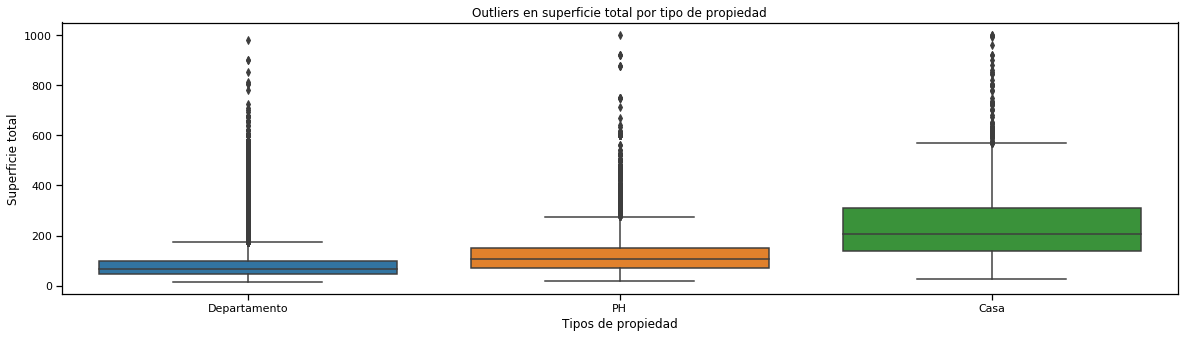

In [38]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(20,5))
sns.boxplot(data = df_v1, y = "surface_total", x="property_type")
plt.ylabel("Superficie total")
plt.xlabel("Tipos de propiedad")
plt.title("Outliers en superficie total por tipo de propiedad")

In [39]:
df_v2 = df_v1.copy()
#df_v2 = df_v2.dropna(axis=0,how='any')

Revisamos los valores atipicos y observamos que para Departamentos y para Pen House hay valores muy alejados de la media
y que podrian afectar nuestros analisis estadisticos. Debemos hacer algo con estos valores!!!, hagamos una limpieza de
outliers.

In [40]:
#Get relevant percentiles and see their distribution
df_v2['surface_total'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      15.000000
0.1      38.000000
0.2      45.000000
0.3      51.076348
0.4      60.000000
0.5      70.000000
0.6      80.000000
0.7      97.000000
0.8     121.750000
0.9     171.000000
1.0    1000.000000
Name: surface_total, dtype: float64

In [41]:
#Funcion para detectar los outliers usando IQR
def detect_outliersIQR(data,columnName):
    
    outliers=[]    
    list_types =data['property_type'].unique().tolist()
    for n in list_types:    
        Q1 = np.percentile(data[data["property_type"]==n][columnName], 25, interpolation = 'midpoint') 
        #Q3 = np.percentile(data[columnName], 75, interpolation = 'midpoint')     
        Q3 = np.percentile(data[data["property_type"]==n][columnName], 75, interpolation = 'midpoint')         
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR 
        up_lim = Q3 + 1.5 * IQR     
    

    
        for i in data[data["property_type"]==n].itertuples():
            if ((i[1] > up_lim) or (i[1] < low_lim)):
                outliers.append(i[2])
    return outliers

Filtrado de outliers

In [42]:
df_v3= df_v2.copy()

df_outliers = detect_outliersIQR(df_v3[['rooms','unique_id','property_type']],'rooms')
df_v3 = df_v3[~df_v3['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_v3[['price','unique_id','property_type']],'price')
df_v3 = df_v3[~df_v3['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_v3[['bedrooms','unique_id','property_type']],'bedrooms')
df_v3 = df_v3[~df_v3['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_v3[['bathrooms','unique_id','property_type']],'bathrooms')
df_v3 = df_v3[~df_v3['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_v3[['surface_total','unique_id','property_type']],'surface_total')
df_v3 = df_v3[~df_v3['unique_id'].isin(df_outliers)]

df_outliers = detect_outliersIQR(df_v3[['surface_covered','unique_id','property_type']],'surface_covered')
df_v3 = df_v3[~df_v3['unique_id'].isin(df_outliers)]




In [43]:
#Se eliminan inconsistencias de propiedades con superficie cubierta mayor a superficie total
df_v3 = df_v3[(df_v3['surface_covered'] <= df_v3['surface_total'])]

In [44]:
df_v3.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,unique_id
count,60825.000000,60813.000000,63606.000000,63606.000000,63606.000000,63606.000000,63606.000000,63606.000000,6.360600e+04
mean,-34.600009,-58.439473,2.543974,1.613936,1.299218,68.498182,60.191097,172094.241880,-1.045096e+17
std,0.024858,0.036836,0.984388,0.814400,0.526990,40.780983,30.460121,86912.616582,5.304573e+18
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,15.000000,1.000000,7500.000000,-9.222399e+18
25%,-34.616469,-58.465301,2.000000,1.000000,1.000000,44.000000,40.715138,110000.000000,-4.667097e+18
50%,-34.600688,-58.438437,2.000000,1.000000,1.000000,58.000000,52.000000,150000.000000,-1.976948e+17
75%,-34.583997,-58.411980,3.000000,2.000000,2.000000,81.000000,72.000000,215000.000000,4.365709e+18
max,-34.535818,-58.353930,9.000000,5.000000,5.000000,511.000000,350.000000,790000.000000,9.222903e+18


In [45]:
df_v3['price'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      7500.0
0.1     85000.0
0.2    101000.0
0.3    118000.0
0.4    133900.0
0.5    150000.0
0.6    169000.0
0.7    196000.0
0.8    235000.0
0.9    290000.0
1.0    790000.0
Name: price, dtype: float64

In [46]:
df_v3

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,unique_id
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,-2272130314653733695
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,6378586259915611934
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,9099789255698012061
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,8498139802069818155
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,8498139802069818155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146545,2019-07-31,2019-09-04,2019-07-31,-34.581425,-58.442707,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,USD,Palermo Hollywood - 3 Amb c/ dependencia y coc...,"Exclusivo 3 ambientes c/depend., balcón al con...",Departamento,Venta,1329414818776461224
146546,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,89.0,82.0,434999.0,USD,Quo Palermo 3 amb a la venta a estrenar,Edifico Quo Palermo Paraguay 4445Piso alto 81m...,Departamento,Venta,-8950415177056397077
146548,2019-07-31,2019-11-15,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,USD,VENTA 3 AMBIENTES CON COCHERA Y BAULERA - COMP...,"TORRE QUARTIER BOULEVARD, 3 AMBIENTES ESPECTAC...",Departamento,Venta,1005249632598986684
146549,2019-07-31,2019-10-12,2019-07-31,-34.576573,-58.434394,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,USD,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,Venta,-1823521494401539993


In [47]:
df_v3.set_index('unique_id')
df.set_index('unique_id')
print('')

In [48]:
df_v3['surface_total'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     15.000000
0.1     36.411083
0.2     42.000000
0.3     46.866667
0.4     52.000000
0.5     58.000000
0.6     66.000000
0.7     75.000000
0.8     87.000000
0.9    108.000000
1.0    511.000000
Name: surface_total, dtype: float64

Text(0.5, 1.0, 'Outliers en superficie total por tipo de propiedad')

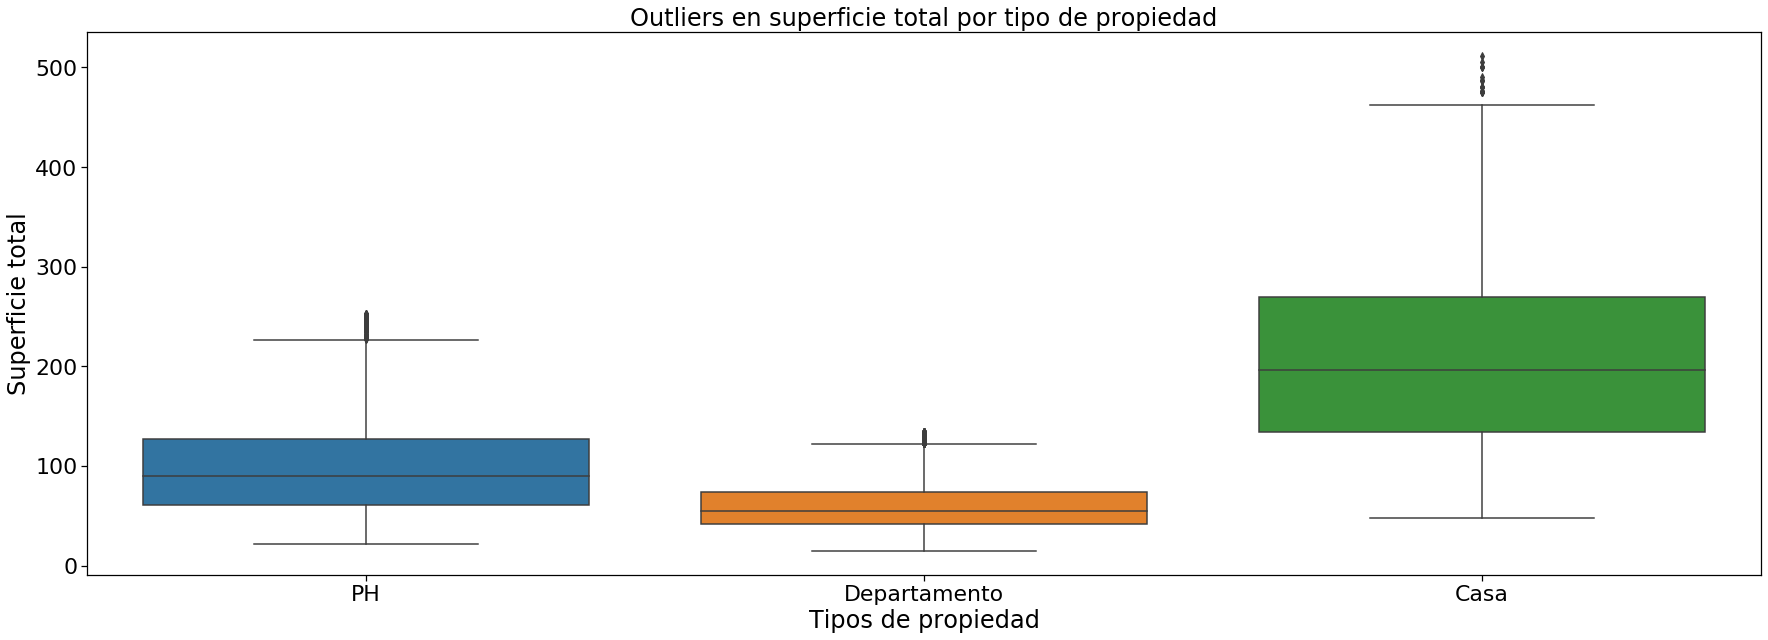

In [49]:
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(30,10))
sns.boxplot(data = df_v3, y = "surface_total", x="property_type")
plt.ylabel("Superficie total")
plt.xlabel("Tipos de propiedad")
plt.title("Outliers en superficie total por tipo de propiedad")

Ahora nuestro BoxPlot luce mucho mejor!!!, ahora nuestros datos están menos dispersos por tipo de propiedad.

In [50]:
df_v4 = df_v3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type','l2','l3','unique_id']]

In [51]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

df_v4["location_code"] = lb_make.fit_transform(df_v4['l2'] +'|'+ df_v4['l3'])
df_v4["property_type_code"] = lb_make.fit_transform(df_v4['property_type'] )

F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
F:\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
df_v4

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l2,l3,unique_id,location_code,property_type_code
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Capital Federal,Boedo,-2272130314653733695,8,2
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Capital Federal,Palermo,6378586259915611934,26,2
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Capital Federal,Palermo,9099789255698012061,26,2
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Capital Federal,Villa Crespo,8498139802069818155,44,2
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Capital Federal,Villa Crespo,8498139802069818155,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...
146545,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento,Capital Federal,Palermo,1329414818776461224,26,1
146546,3.0,2.0,2.0,89.0,82.0,434999.0,Departamento,Capital Federal,Palermo,-8950415177056397077,26,1
146548,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento,Capital Federal,Palermo,1005249632598986684,26,1
146549,3.0,2.0,1.0,84.0,84.0,178000.0,PH,Capital Federal,Palermo,-1823521494401539993,26,2


In [53]:
df_v5 = df_v4

df_v5 = df_v5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type_code','location_code']]
df_v5.head()



,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_code,location_code
1,2.0,1.0,2.0,70.0,58.0,159000.0,2,8
2,2.0,1.0,1.0,45.0,45.0,125000.0,2,26
3,2.0,1.0,1.0,85.0,50.0,295000.0,2,26
5,2.0,1.0,1.0,56.0,56.0,150000.0,2,44
6,2.0,1.0,1.0,70.0,70.0,159500.0,2,44


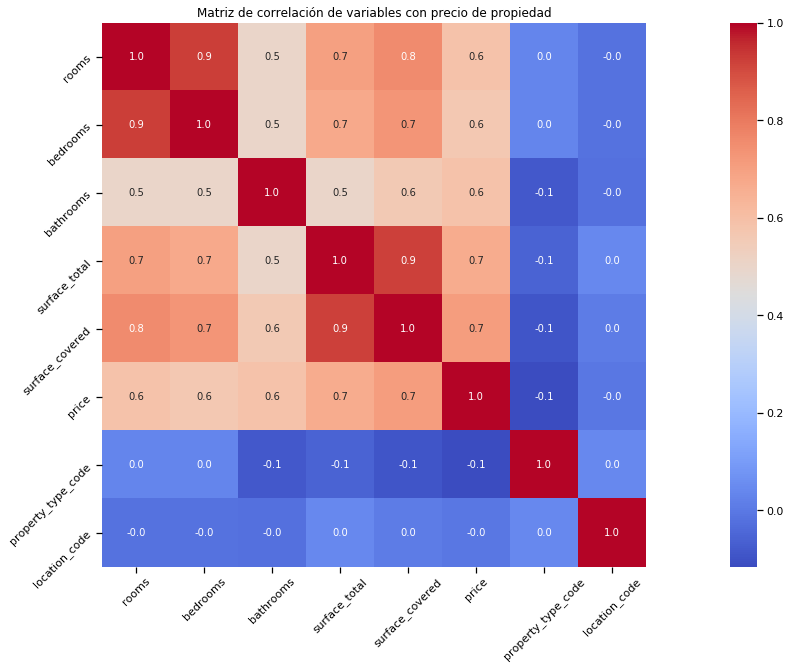

In [54]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(30,10))

df_v5_cor = df_v5.corr()

sns.heatmap(df_v5_cor, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 10},
           xticklabels= df_v5_cor.columns, 
           yticklabels= df_v5_cor.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Matriz de correlación de variables con precio de propiedad")
plt.show()#fmt: Cantidad de decimales

Esperaba que la ubicación de la propiedad tubiera mucha correlación con el precio. Sin embargo, las variables superficie total,
cubierta, número de cuartos, baños y alcobas tienen buena correlación y pueden ser muy buenos predictores.

Ahora hagamos una matriz de correlación por algunos de los tipos de propiedad

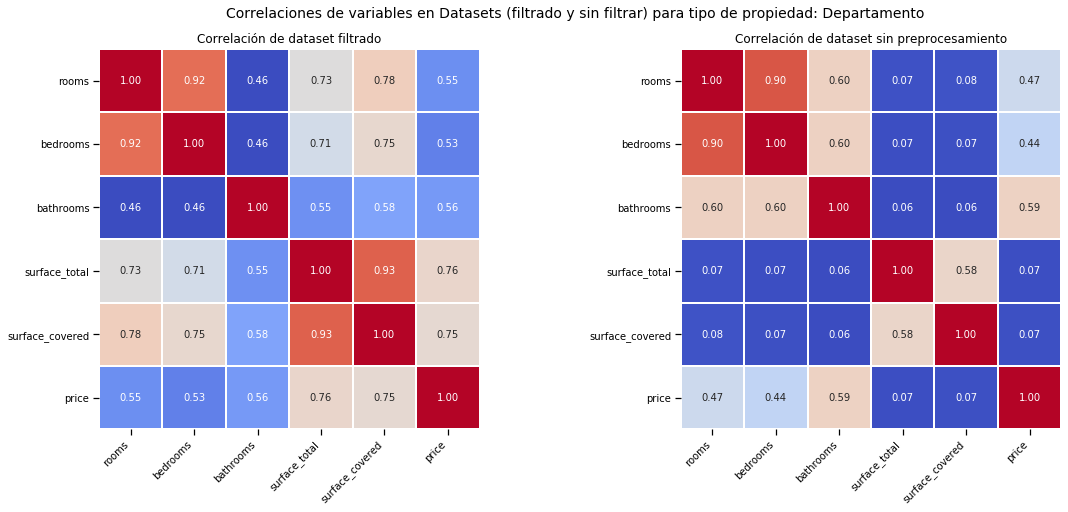

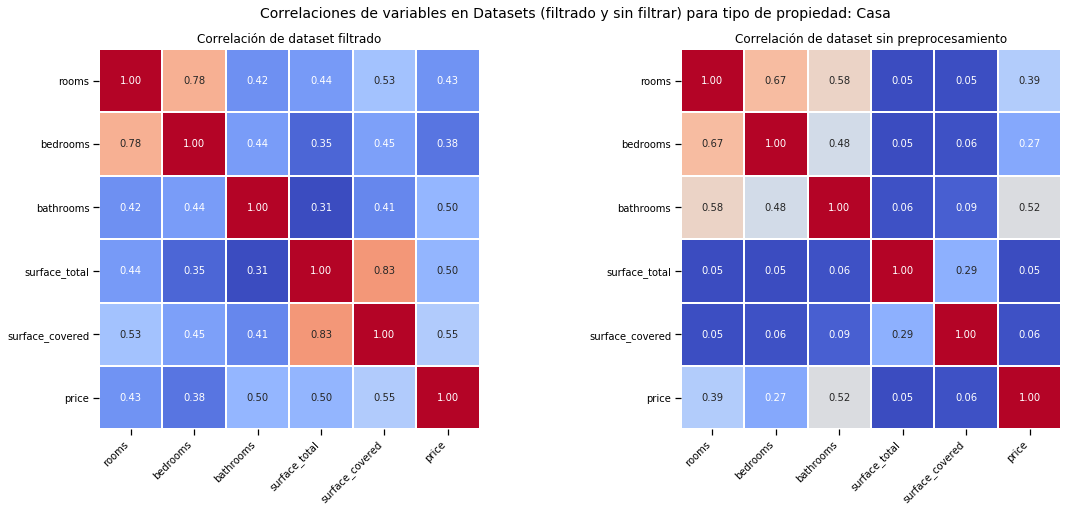

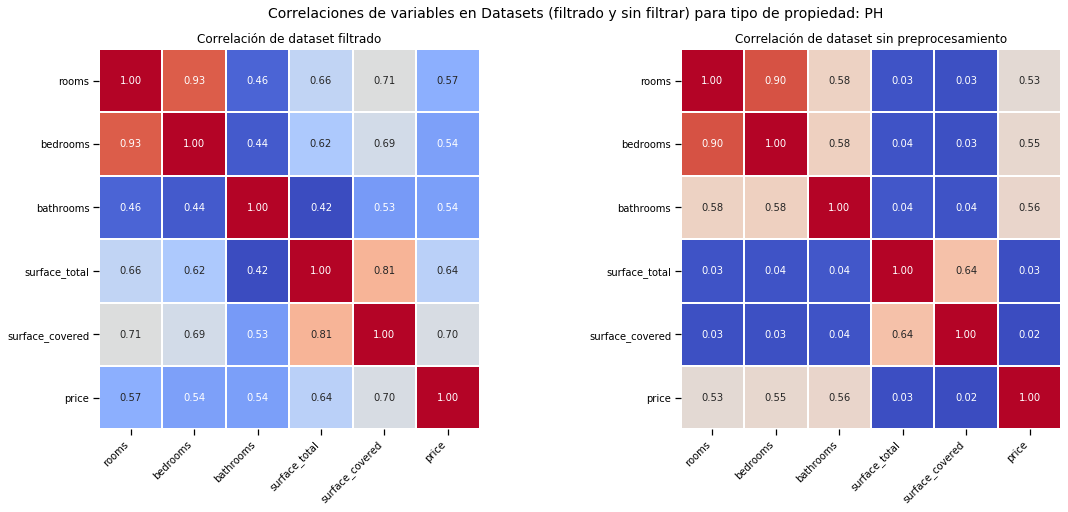

In [55]:
df_v6 = df_v4
columns = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']
#Las instancias Depósito, Cochera, Lote comercial y Oficina son omitidas dada la cantidad de instancias luego de limpiar el dataset.
propiedades = ["Departamento", "Casa", "PH"]

for tipo in propiedades:
    fig, axes = plt.subplots(1,2, figsize=(16,7), constrained_layout=True)
    ax1, ax2 = axes.flatten()

    data = df_v6[df_v6["property_type"] == tipo]
    corr = data[columns].corr(method="pearson")
    sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
               cmap= 'coolwarm', linewidths=1, ax=ax1)
    ax1.set_xticklabels(data[columns].columns,rotation = 45, fontsize = 10,horizontalalignment= 'right')
    ax1.set_title("Correlación de dataset filtrado", fontsize=12)
    ax1.set_yticklabels(data[columns].columns,rotation = 0, fontsize = 10)    

    data = df[df["property_type"] == tipo]
    corr2 = data[columns].corr(method="pearson")
    sns.heatmap(corr2, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
               cmap= 'coolwarm', linewidths=1, ax=ax2)
    ax2.set_title("Correlación de dataset sin preprocesamiento", fontsize=12)
    ax2.set_yticklabels(data[columns].columns,rotation = 0, fontsize = 10)
    plt.xticks(rotation= 45, fontsize= 10, horizontalalignment= 'right')

    plt.suptitle(f"Correlaciones de variables en Datasets (filtrado y sin filtrar) para tipo de propiedad: {tipo}", fontsize=14)

Text(0.5, 1.08, 'Pairplot para visualizar relación y proporcionalidad de variables')

<Figure size 2160x720 with 0 Axes>

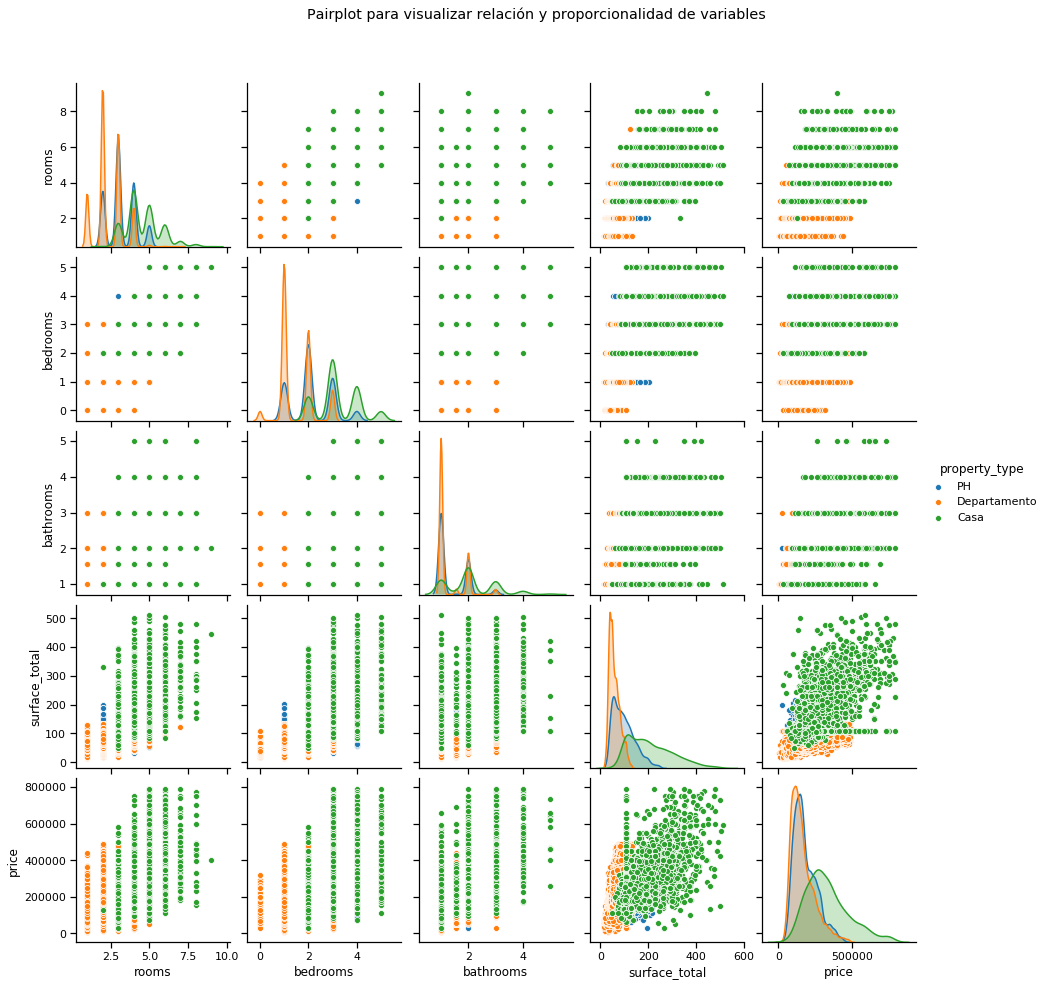

In [56]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(30,10))
df_v7 = df_v4[['rooms','bedrooms','bathrooms','surface_total','price','property_type']]
g = sns.pairplot(df_v7, hue="property_type")
g.fig.suptitle("Pairplot para visualizar relación y proporcionalidad de variables", y=1.08)

Hagamos un pairplot con las variables que han demostrado ser buenos predictores. Con este confirmamos y nuevamente observamos
la buena relación del precio con la superficie total, incluso con el número de cuartos y de baños, se observa igualmente
la proporcion mayor de instancias de tipo departamento. También algo que no habia notado y es que las casas reflejan mayor 
cantidad de instancias en el ranking de mayor número de cuartos, alcobas y baños, claro por la mayor superficie.

In [57]:
df_v4.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l2,l3,unique_id,location_code,property_type_code
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Capital Federal,Boedo,-2272130314653733695,8,2
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Capital Federal,Palermo,6378586259915611934,26,2
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Capital Federal,Palermo,9099789255698012061,26,2
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Capital Federal,Villa Crespo,8498139802069818155,44,2
6,2.0,1.0,1.0,70.0,70.0,159500.0,PH,Capital Federal,Villa Crespo,8498139802069818155,44,2


Ahora vamos a proceder a realizar escalado de los datos, el no hacerlo puede llevar a algunos modelos de Machine Learning a  confundirse, ya que no saben de unidades. Por ejemplo, para un modelo de vecinos más cercanos, 5 kilogramos de distancia en el peso es diez veces más que 0.5 metros de distancia en la altura. Si, en cambio, la altura está medida en centímetros, ocurre lo inverso, así que de alguna forma debemos asegurarnos que nuestros modelos no se confundan.

Usaremos estandarización de datos o escalado por Z-Score también conocido como normalización, la idea es hacerlo en función de la desviación estándar. Pero para hacerlo bien, debemos usar un punto de referencia. En general, se utiliza el valor medio, obteniendo de esta forma el Z-Score. 

In [58]:
df_v8 = df_v4.copy()
df_v8 = df_v8[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type','property_type_code','location_code','unique_id']]

In [59]:
df_v8['property_type_src']=df_v8['property_type']

Antes de realizar el escalado debemos aplicar encoding en nuestros datos categoricos de interes, inicialmente habiamos aplicado LabelEncoding al tipo de propiedad. Sin embargo, LabelEncoding es de gran utilidad para valores categoricos ordinales pero para el tipo de propiedad no aplica, por lo anterior aplicaremos One-Hot Encoding.

In [60]:
df_v8 = pd.get_dummies(df_v8, columns=["property_type"], prefix=[ "type"])

In [61]:
df_v8.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_code,location_code,unique_id,property_type_src,type_Casa,type_Departamento,type_PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,2,8,-2272130314653733695,PH,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,2,26,6378586259915611934,PH,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,2,26,9099789255698012061,PH,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,2,44,8498139802069818155,PH,0,0,1
6,2.0,1.0,1.0,70.0,70.0,159500.0,2,44,8498139802069818155,PH,0,0,1


Verificamos nuestros tipos de datos

In [62]:
df_v8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63606 entries, 1 to 146550
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rooms               63606 non-null  float64
 1   bedrooms            63606 non-null  float64
 2   bathrooms           63606 non-null  float64
 3   surface_total       63606 non-null  float64
 4   surface_covered     63606 non-null  float64
 5   price               63606 non-null  float64
 6   property_type_code  63606 non-null  int32  
 7   location_code       63606 non-null  int32  
 8   unique_id           63606 non-null  int64  
 9   property_type_src   63606 non-null  object 
 10  type_Casa           63606 non-null  uint8  
 11  type_Departamento   63606 non-null  uint8  
 12  type_PH             63606 non-null  uint8  
dtypes: float64(6), int32(2), int64(1), object(1), uint8(3)
memory usage: 5.0+ MB


Procedemos al escalado

In [63]:
df_v9 = df_v8.copy()

In [64]:
df_v9['price_scl']=df_v9['price']

In [65]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()
#df_v9[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price_scl']] = scaler.fit_transform(df_v9[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price_scl']])



In [66]:
df_v9.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_code,location_code,unique_id,property_type_src,type_Casa,type_Departamento,type_PH,price_scl
1,2.0,1.0,2.0,70.0,58.0,159000.0,2,8,-2272130314653733695,PH,0,0,1,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0,2,26,6378586259915611934,PH,0,0,1,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0,2,26,9099789255698012061,PH,0,0,1,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0,2,44,8498139802069818155,PH,0,0,1,150000.0
6,2.0,1.0,1.0,70.0,70.0,159500.0,2,44,8498139802069818155,PH,0,0,1,159500.0


In [67]:
from sklearn import preprocessing 

mean_of_array = df_v9['price'].mean(axis=0)
std_of_array = df_v9['price'].std(axis=0)

scaler = preprocessing.StandardScaler() 
df_v9[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price_scl']] = scaler.fit_transform(df_v9[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price_scl']])


In [68]:
#df_v9['price'] = (df_v9['price_scl'] * std_of_array) + mean_of_array

In [69]:
df_v9.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_code,location_code,unique_id,property_type_src,type_Casa,type_Departamento,type_PH,price_scl
1,-0.552605,-0.753857,1.329792,0.036827,-0.071934,159000.0,2,8,-2272130314653733695,PH,0,0,1,-0.150661
2,-0.552605,-0.753857,-0.567791,-0.576209,-0.498725,125000.0,2,26,6378586259915611934,PH,0,0,1,-0.541862
3,-0.552605,-0.753857,-0.567791,0.404648,-0.334574,295000.0,2,26,9099789255698012061,PH,0,0,1,1.414141
5,-0.552605,-0.753857,-0.567791,-0.306473,-0.137594,150000.0,2,44,8498139802069818155,PH,0,0,1,-0.254214
6,-0.552605,-0.753857,-0.567791,0.036827,0.322027,159500.0,2,44,8498139802069818155,PH,0,0,1,-0.144908


Se realizo ensayo con MinMaxScaler pero aunque realmente la mejora con el escalado fue muy minima, StandardScaler lo hizo mejor.

### Aplicando SVD y PCA

Dentro del aprendizaje no supervisado existen modelos de clustering y otros de reducción de dimensionalidad: Singular Value Decomposition y Principal Component Analysis. PCA es el modelo más utilizado actualmente, y también puede entenderse como una versión particular de SVD. Los modelos de reducción de dimensionalidad son parte del aprendizaje no supervisado dentro del universo de machine learning. Estos modelos nos pueden servir tanto para mejorar la eficiencia, como mencionamos más arriba, como también para tener un mejor entendimiento de nuestros datos.

Estos modelos nos sirven para achicar la cantidad de atributos que tiene un dataset. ¡Saber realizar una buena reducción de dimensionalidad es una parte muy importante de las tareas de un científico/a de datos! No solo para mejorar el desempeño de los modelos, sino también para visualizar y comprender mejor tu dataset. Es decir, buscar reducir la cantidad de features de un dataset, pero reteniendo la mayor cantidad de “información” posible.

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [71]:
df_v9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63606 entries, 1 to 146550
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rooms               63606 non-null  float64
 1   bedrooms            63606 non-null  float64
 2   bathrooms           63606 non-null  float64
 3   surface_total       63606 non-null  float64
 4   surface_covered     63606 non-null  float64
 5   price               63606 non-null  float64
 6   property_type_code  63606 non-null  int32  
 7   location_code       63606 non-null  int32  
 8   unique_id           63606 non-null  int64  
 9   property_type_src   63606 non-null  object 
 10  type_Casa           63606 non-null  uint8  
 11  type_Departamento   63606 non-null  uint8  
 12  type_PH             63606 non-null  uint8  
 13  price_scl           63606 non-null  float64
dtypes: float64(7), int32(2), int64(1), object(1), uint8(3)
memory usage: 5.5+ MB


In [72]:
df_v9

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_code,location_code,unique_id,property_type_src,type_Casa,type_Departamento,type_PH,price_scl
1,-0.552605,-0.753857,1.329792,0.036827,-0.071934,159000.0,2,8,-2272130314653733695,PH,0,0,1,-0.150661
2,-0.552605,-0.753857,-0.567791,-0.576209,-0.498725,125000.0,2,26,6378586259915611934,PH,0,0,1,-0.541862
3,-0.552605,-0.753857,-0.567791,0.404648,-0.334574,295000.0,2,26,9099789255698012061,PH,0,0,1,1.414141
5,-0.552605,-0.753857,-0.567791,-0.306473,-0.137594,150000.0,2,44,8498139802069818155,PH,0,0,1,-0.254214
6,-0.552605,-0.753857,-0.567791,0.036827,0.322027,159500.0,2,44,8498139802069818155,PH,0,0,1,-0.144908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146545,0.463262,0.474051,1.329792,0.478212,0.715988,399000.0,1,26,1329414818776461224,Departamento,0,1,0,2.610755
146546,0.463262,0.474051,1.329792,0.502734,0.715988,434999.0,1,26,-8950415177056397077,Departamento,0,1,0,3.024956
146548,0.463262,0.474051,1.329792,0.331084,0.715988,475000.0,1,26,1005249632598986684,Departamento,0,1,0,3.485203
146549,0.463262,0.474051,-0.567791,0.380127,0.781648,178000.0,2,26,-1823521494401539993,PH,0,0,1,0.067951


### PCA

In [73]:
df_v10 = df_v9.copy()

In [74]:
df_v10 =df_v10[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price_scl','type_Casa','type_Departamento','type_PH']]

In [75]:
df_v10.shape

(63606, 9)

In [76]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=3)
#principalComponents = pca.fit_transform(adf_svd)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [77]:
#pca.explained_variance_ratio_

In [78]:
#finalDf = pd.concat([principalDf, df_v10[['price']]], axis = 1)

shape of X_pca (63606, 3)
[0.72219914 0.11959496 0.09590603]
suma: 0.9377001297397042


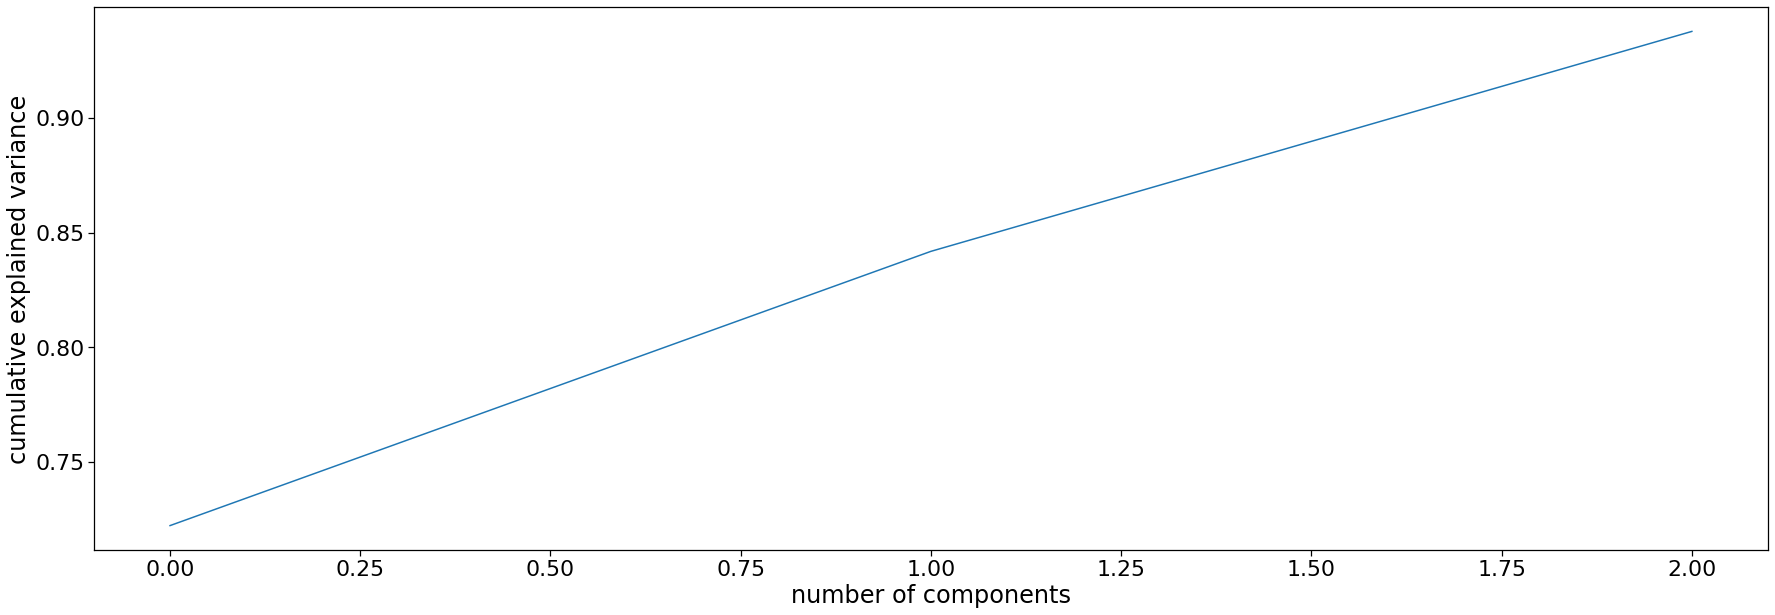

In [79]:
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
 
sns.set_context("notebook", font_scale=2)
plt.figure(figsize=(30,10))


df = df_v10.drop(['price_scl'], axis=1) # quito la variable dependiente "Y"
#scaler.fit(df) # calculo la media para poder hacer la transformacion
#X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=3) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(df) # obtener los componentes principales
X_pca=pca.transform(df) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 

En esta gráfica de variabilidad explicada acumulada, vemos que tomando los primeros 2 componentes pasamos al 85%

In [80]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [81]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-0.054589,1.381497,0.591450
1,-1.199498,-0.266815,0.299416
2,-0.671125,-0.394548,0.931365
3,-0.903373,-0.320735,0.607585
4,-0.526486,-0.389361,0.999800
...,...,...,...
63601,1.441438,0.920420,-0.058120
63602,1.452689,0.917471,-0.044066
63603,1.373935,0.938116,-0.142441
63604,0.890456,-1.000384,0.325375


Luego de aplicar PCA los resultados no son muy alentadores, se desmejora un poco el score de mi modelo de machine learning, por ende optaré por omitir esta técnica para el proyecto, quizas si hubienes muchas mas dimensiones o atributos. Para nuestro caso por lo menos no dio los resultados esperados.
Raíz del error cuadrático medio en Train: 46080.90410756944
Raíz del error cuadrático medio en Test: 49819.5227611139

### Machine Learning

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

In [82]:
from sklearn.tree import DecisionTreeClassifier # Importar el classificador
from sklearn.model_selection import train_test_split # Importar funciones de particion
from sklearn import metrics #Importar las metricas de scikit-learn
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

In [83]:
df_v9.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_code,location_code,unique_id,property_type_src,type_Casa,type_Departamento,type_PH,price_scl
1,-0.552605,-0.753857,1.329792,0.036827,-0.071934,159000.0,2,8,-2272130314653733695,PH,0,0,1,-0.150661
2,-0.552605,-0.753857,-0.567791,-0.576209,-0.498725,125000.0,2,26,6378586259915611934,PH,0,0,1,-0.541862
3,-0.552605,-0.753857,-0.567791,0.404648,-0.334574,295000.0,2,26,9099789255698012061,PH,0,0,1,1.414141
5,-0.552605,-0.753857,-0.567791,-0.306473,-0.137594,150000.0,2,44,8498139802069818155,PH,0,0,1,-0.254214
6,-0.552605,-0.753857,-0.567791,0.036827,0.322027,159500.0,2,44,8498139802069818155,PH,0,0,1,-0.144908


In [84]:
y = df_v9['price']
#X2 = df_v9[['rooms','surface_covered','bedrooms','location_code']]
#X2 = df_v9[['rooms','surface_total','property_type_code','bathrooms','surface_covered','bedrooms','location_code']]
X2 = df_v9[['rooms','surface_total','property_type_code','bathrooms','surface_covered','bedrooms',
            'location_code','type_Casa','type_Departamento','type_PH']]

In [85]:
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.30, random_state=42)

In [86]:
print(X2_train.shape, y_train.shape, X2_test.shape, y_test.shape)

(44524, 10) (44524,) (19082, 10) (19082,)


In [87]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']


def graphSquaredError(linear_model, tree_regressor, knn_regressor, X1_train, X1_test, y_train, y_test):
    sns.set_context("notebook", font_scale=2)
    for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X1_train)
        y_test_pred = model.predict(X1_test)
    
    
        print(f'Modelo: {modelos[i]}')

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
        #plt.figure(figsize = (8,4))
        plt.figure(figsize=(30,10))

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()


        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s =2)
    
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
    
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
    
        plt.tight_layout()
        plt.show()

In [88]:
from sklearn.metrics import mean_squared_error
import seaborn as sns



def graphSquaredErrorRFR(forest_regressor, X1_train, X1_test, y_train, y_test):
    sns.set_context("notebook", font_scale=2)
    for i, model in enumerate([forest_regressor]):
        y_train_pred = model.predict(X1_train)
        y_test_pred = model.predict(X1_test)
    
    
        

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
        plt.figure(figsize = (30,10))
        

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()


        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s =2)
    
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
    
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
    
        plt.tight_layout()
        plt.show()

Iniciaré probando un modelo sencillo de DecisionTreeRegressor, el cual fue mi mejor predictor en el proyecto 1

Resultado DecisionTreeRegressor sin optimización de parametros

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 53494.71026988979
Raíz del error cuadrático medio en Test: 53398.45975646313

### DecisionTreeRegressor(max_depth=3, random_state=42)

In [89]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X2_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

Raíz del error cuadrático medio en Train: 56810.96283760146
Raíz del error cuadrático medio en Test: 57220.08413594593


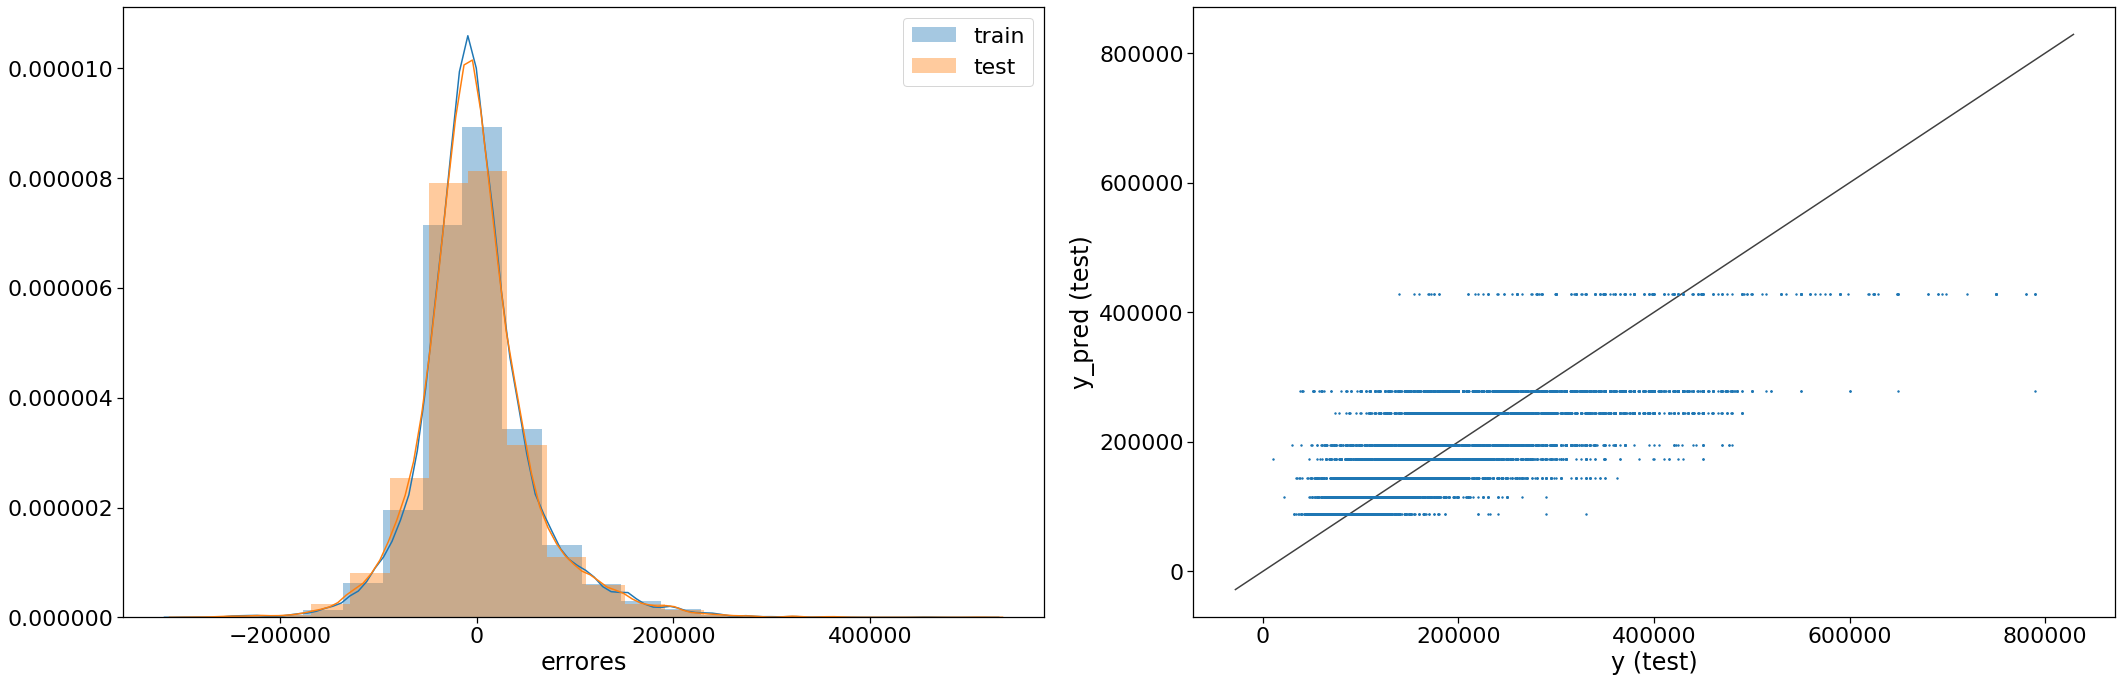

In [90]:
graphSquaredErrorRFR(tree_regressor,X2_train, X2_test, y_train, y_test)

Se observa que con las nuevas técnicas aplicadas a los datos los resultados fueron iguales a los modelos del primer proyecto, se espera que al aplicar hyperparametros y las demas tecnicas avanzadas el modelo tenga mucho mejores resultados que el mejor del primer proyecto. Lo anterior quizas a causa del escalado de datos y a que en este modelo no se eliminaron los datos con valores faltantes sino que que imputaron, por ende el modelo esta trabajando con una data un poco más amplia. Sin embargo el modelo es bueno en comparación con sus resultados sin haber realizado ningun tratamiento a los datos.

### Modelos Avanzados e Interpretación de modelos
#### Modelos Avanzados
Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

#### Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

Analizamos nuestra distribución de datos de prueba y entrenamiento

In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean

Vamos a crear una función que nos sirva para evaluar modelos de regresión.

In [92]:
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    # get the slope and intercept of the line best fit

    print(f'Ordenada intercept_ : {model.intercept_}')
    print(f'Pendientes Coeficientes de X para grado_ : {model.coef_}')    

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(x,y, s = 2, label = 'Datos')
    plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    plt.plot(list1, list2,label ='Regresión (train)')
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.plot(list1, list2,label = 'Regresión (test)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

### Linear Regression

In [93]:
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X2_train, y_train) 
  
# Evaluating the Linear Regression model 
print(linearModel.score(X2_test, y_test)) 

0.5842914618622616


Raíz del error cuadrático medio en Train: 55942.74120808014
Raíz del error cuadrático medio en Test: 56041.78134748997


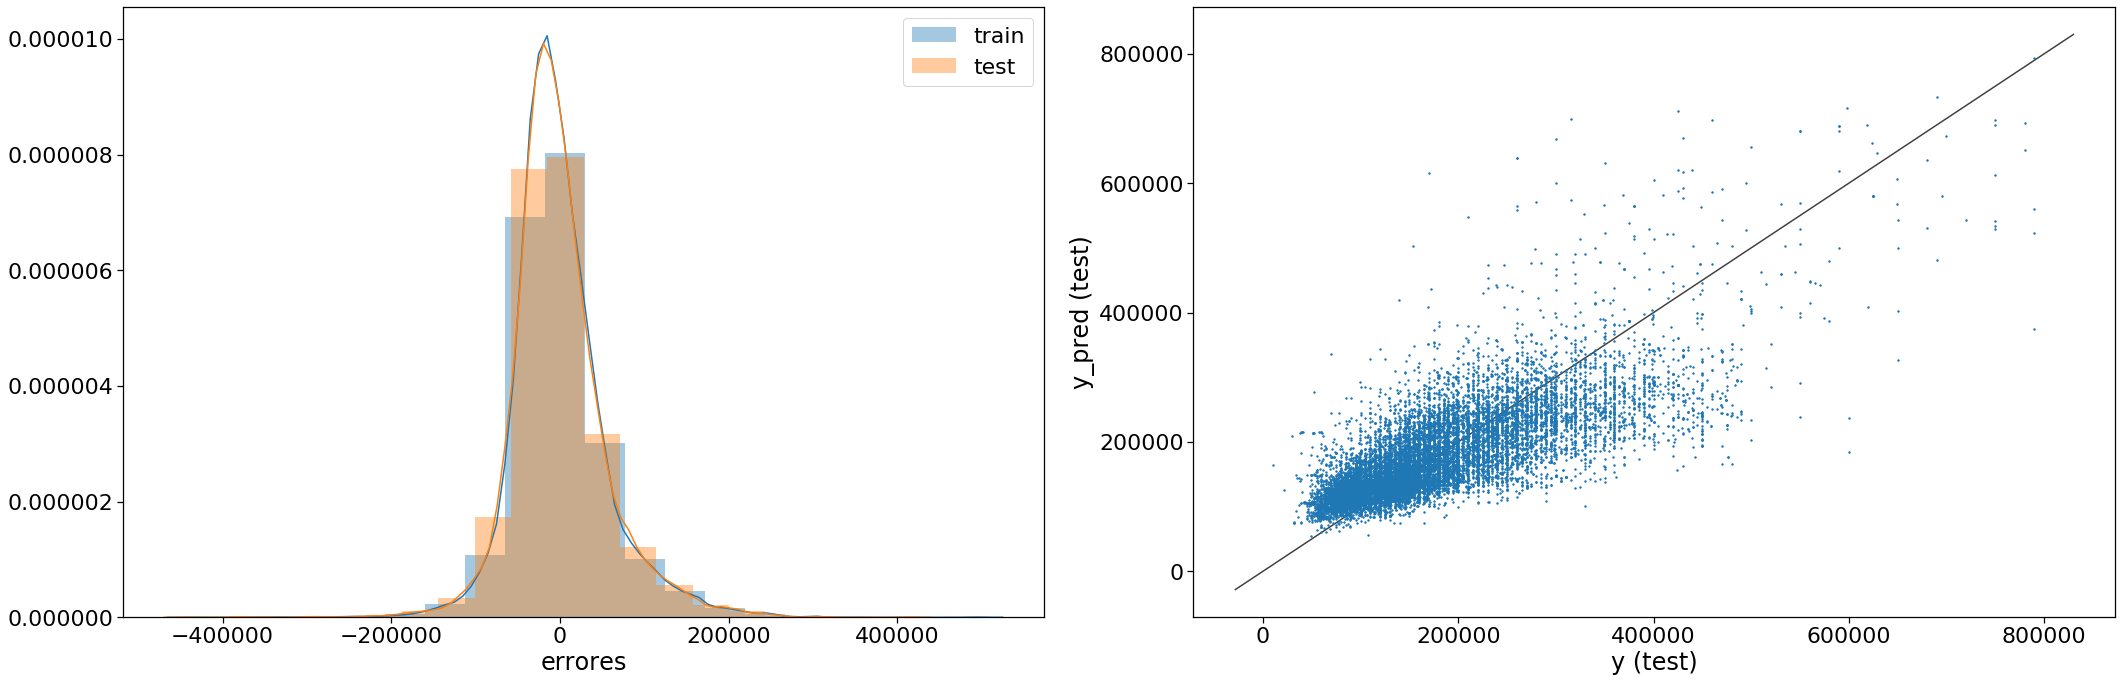

In [94]:
graphSquaredErrorRFR(linearModel,X2_train, X2_test, y_train, y_test)

No esta mal el resultado, la distribución de errores entre los conjuntos es buena. Sin ambargo, se esperan mejores resultados y los anteriores un poco pobres respecto al mejor modelo del proyecto uno. La razón por la cual el modelo no arroja los mejores resultados puede deberse a muchas razones, entre estas destaco dos particulares la primera que es posible que aún pueda tener un poco de ruido en los datos, pero principalmente pienso que la razón es porque mis datos o algunas de mis variables no tienen un comportamiento linea. Por lo que se espera que con modelos no lineales pueda tener mejor comportamiento.

##### Probemos las tecnicas Ridge y Lasso en nuestros modelos de regresión

La regresión de Ridge y Lasso son algunas de las técnicas simples para reducir la complejidad del modelo y evitar el ajuste excesivo que puede resultar de una regresión lineal simple.

### Ridge(L2) Regression

In [95]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X2_train, y_train) 
    scores = cross_val_score(ridgeModel, X2, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 58.26755512903089
0.5 : 58.267560191241486
0.75 : 58.267565216984515
1.0 : 58.267570206279984
1.25 : 58.26757515914787
1.5 : 58.26758007560815
1.75 : 58.2675849556808
2.0 : 58.2675897993858


De acuerdo al autput podemos concluir que el mejor valor de alpha para el modelo es 2.

In [96]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X2_train, y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X2_test, y_test)) 

0.5842897009436219


Raíz del error cuadrático medio en Train: 55942.742409359475
Raíz del error cuadrático medio en Test: 56041.90004232519


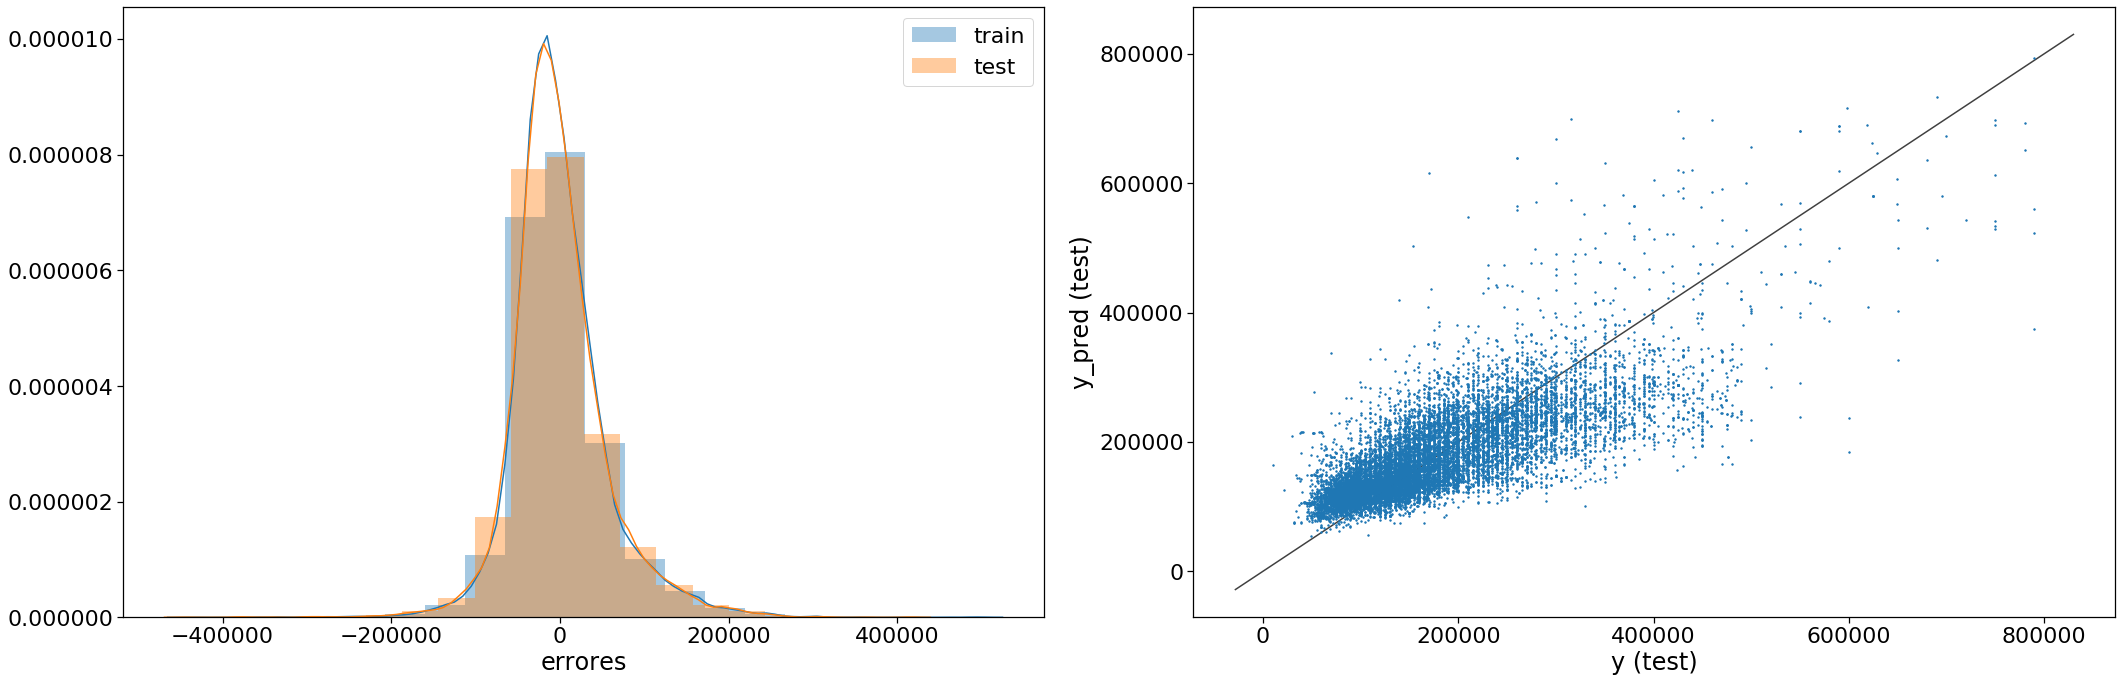

In [97]:
graphSquaredErrorRFR(ridgeModelChosen,X2_train, X2_test, y_train, y_test)

### Lasso(L1) Regression

In [98]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X2_train, y_train) 
    scores = cross_val_score(lassoModel, X2, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 58.26755698588168
0.5 : 58.26756424815295
0.75 : 58.26758314605913
1.0 : 58.26769366618086
1.25 : 58.2676751754735
1.5 : 58.267664871016
1.75 : 58.26763792927376
2.0 : 58.26765816463466


Por los resultados pordemos concluir que el mejor alpha es 1

In [99]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 1, tol = 0.0925) 
lassoModelChosen.fit(X2_train, y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X2_test, y_test))

0.5842921157611543


Raíz del error cuadrático medio en Train: 55942.74280237245
Raíz del error cuadrático medio en Test: 56041.737271328646


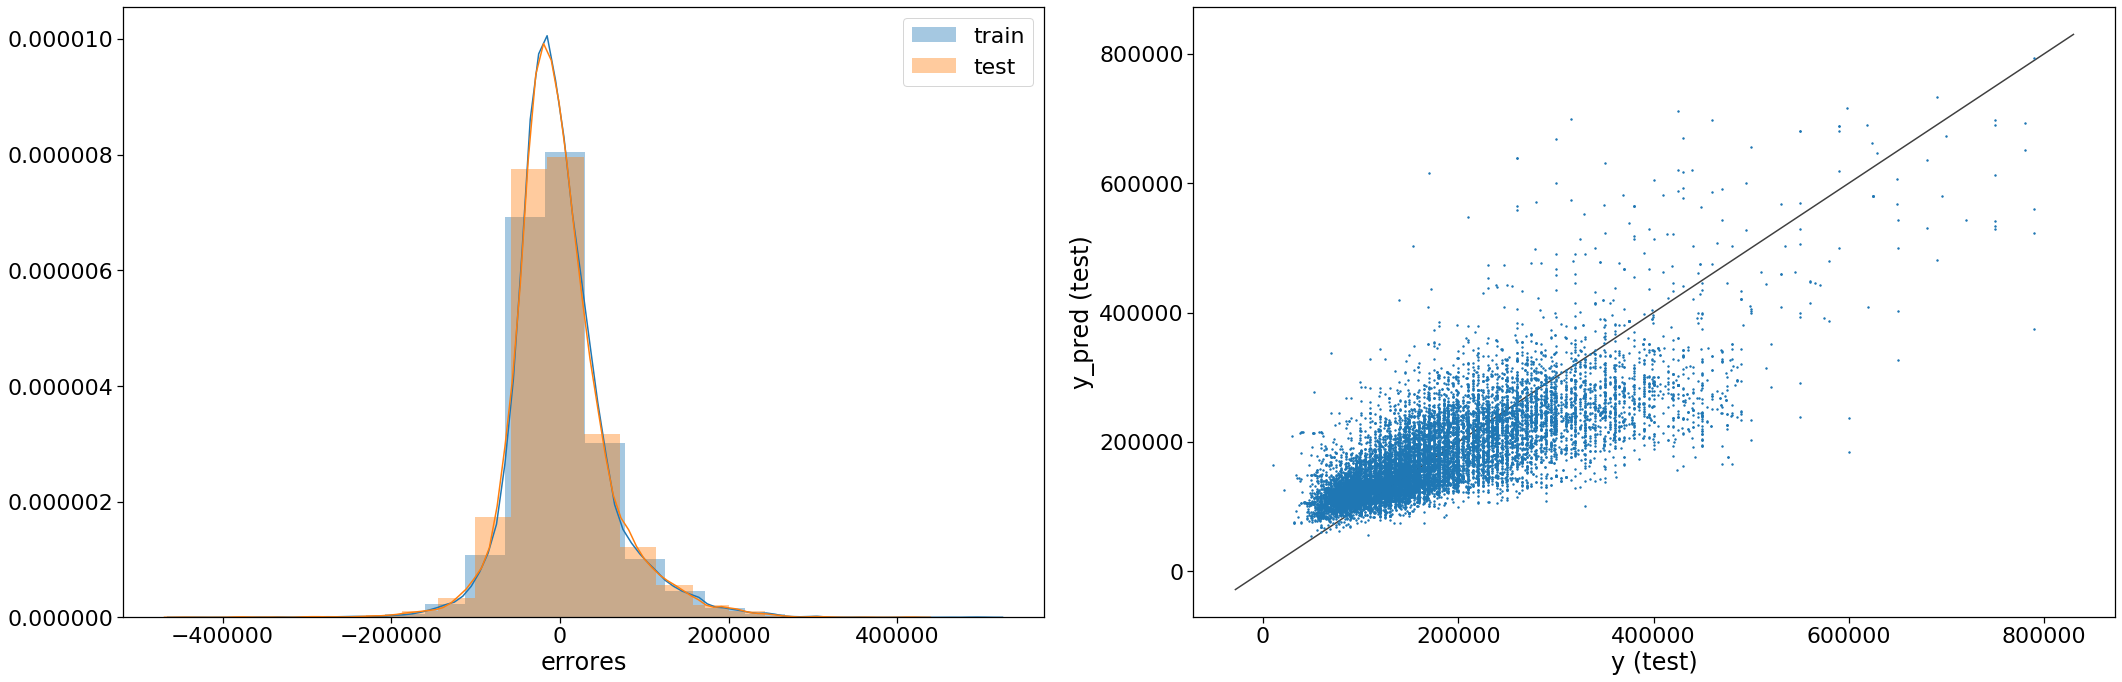

In [100]:
graphSquaredErrorRFR(lassoModelChosen,X2_train, X2_test, y_train, y_test)

Comparando y visualizando resultados

In [101]:
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score(X2_test, y_test), 
         ridgeModelChosen.score(X2_test, y_test), 
         lassoModelChosen.score(X2_test, y_test)] 
  
# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X2_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X2_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X2_test, y_test) 
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

Linear Regreesion : 0.5842914618622616
Ridge Regreesion : 0.5842897009436219
Lasso Regression : 0.5842921157611543


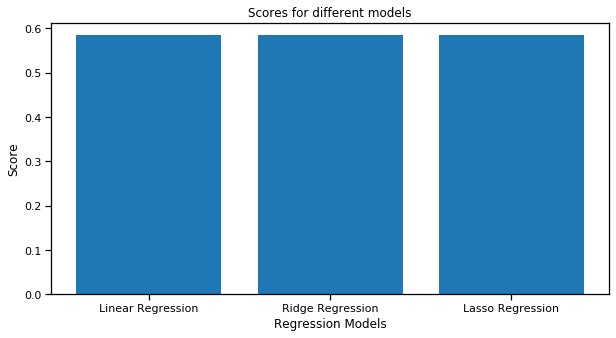

In [102]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(10,5))

# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.title('Scores for different models')
plt.show() 

Observamos que los resultados son muy similares en los modelos y no mejores que con DecisionTreeRegressor por ende buscaremos mejorar nuestro DecisionTreeRegressor con otras tecnicas avanzadas. La razón principal es porque aunque son modelos diferentes los tres buscan linealidad en los datos y la relación en conjunto de las variables no es netamente líneal.

### DecisionTreeRegressor con Hyperparametro max_depth

In [103]:
list_rmse_train = []
list_rmse_test = []

# Lista de posibles max_depth que vamos a testear
max_depths = np.arange(1,25,1)

# Se iteran para encontrar la mejor profundidad
for max_depth in max_depths:
    
    tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    tree.fit(X2_train,y_train)
    
    # Predecir y evaluar con datos de entrenamiento
    y_train_pred = tree.predict(X2_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar con datos de test
    y_test_pred = tree.predict(X2_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    list_rmse_train.append(rmse_train)
    list_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

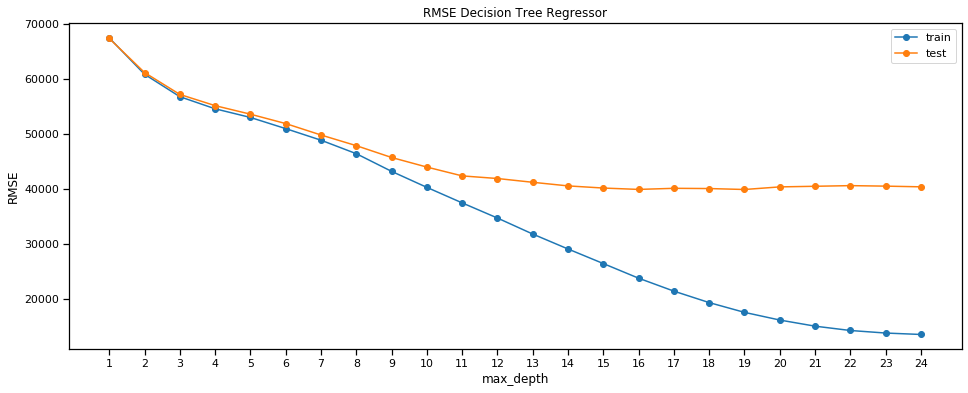

In [104]:
sns.set_context("notebook", font_scale=1)
fig = plt.figure(figsize=(16,6))
plt.plot(max_depths,list_rmse_train,'o-',label='train' )
plt.plot(max_depths,list_rmse_test,'o-',label='test')
plt.legend()
plt.title("RMSE Decision Tree Regressor")
plt.xticks(max_depths)
plt.xlabel("max_depth")
plt.ylabel("RMSE")

In [105]:
print(f"El valor del max_depth seleccionado es {list_rmse_test.index(min(list_rmse_test))+1}")
print("El valor de RMSE para train que minimiza el error en test es",list_rmse_train[list_rmse_test.index(min(list_rmse_test))])
print("El valor mínimo de RMSE para test es",list_rmse_test[list_rmse_test.index(min(list_rmse_test))])

tree_regressor_hyper = DecisionTreeRegressor(max_depth= list_rmse_test.index(min(list_rmse_test))+1)
tree_regressor_hyper.fit(X2_train, y_train)

El valor del max_depth seleccionado es 19
El valor de RMSE para train que minimiza el error en test es 17628.710671433295
El valor mínimo de RMSE para test es 39951.522743932794


DecisionTreeRegressor(max_depth=19)

Raíz del error cuadrático medio en Train: 17628.71067143329
Raíz del error cuadrático medio en Test: 40306.70327922145


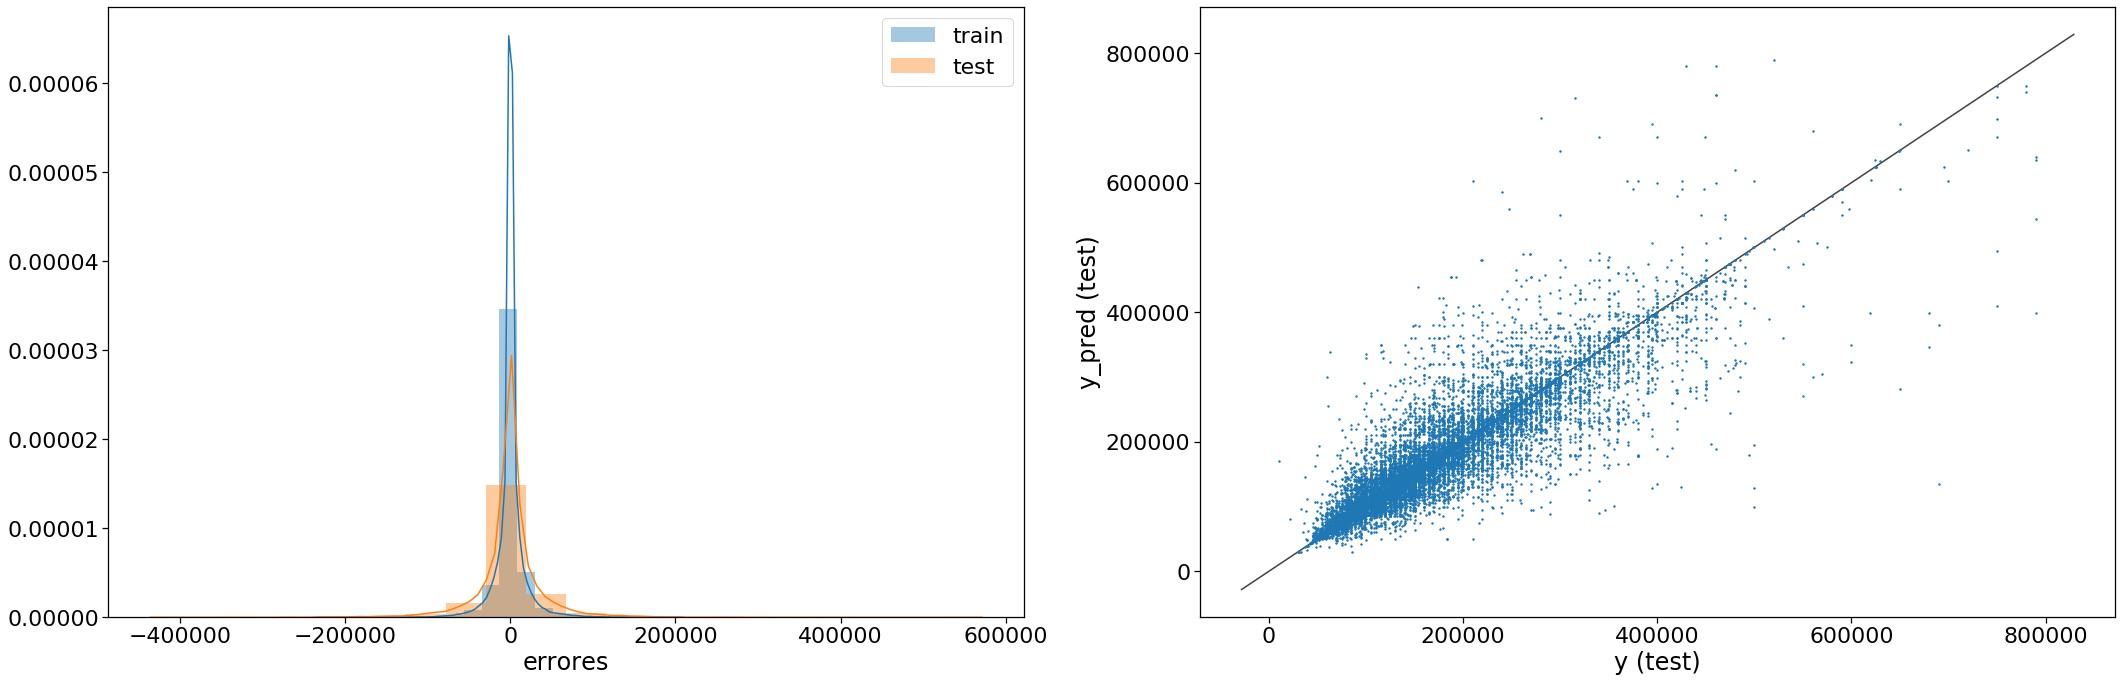

In [106]:
graphSquaredErrorRFR(tree_regressor_hyper,X2_train, X2_test, y_train, y_test)

En anterior es uno de los mejores resultados en cuanto al set de entrenamiento, lo cual me indica como lo hizo el mejor modelo del proyecto 1 que el mejor camino son los arboles de decision. Sin embargo los resultados en el conjunto de pruebas aunque no es malo es muy distante del resultado de entrenamiento, lo anterior me lleva a pensar en que hay algo de overfitting. Por defecto, DecisionTrees se construye hasta que todas las hojas son puras, por lo que esto es completamente esperado, es posible que con un modelo RandomForestRegressor  en lugar de un solo árbol los resultados puedan ser mejores para el set de pruebas dado a que ayuda a manejar el overfitting dando un mejor rendimiento básicamente cada vez, los modelos de ensamble seguramente ayudarán a manejar el sobreajuste al generalizar los resultados del modelo.

### DecisionTreeRegressor(max_depth= 13) navaja de ockham 

Al hacer el tuning del arbol se observa que luego de profundidad 13 el error en test es similar, por ende utilizando el principio de parsimonia o navaja de ockham (ante errores similares (no tenga diferencias significativas) selecciono el modelo más simple), selecciono el modelo con max_depth igual a 13, que incluso me ofrece menor diferencia entre el RMSE de train y test.

In [107]:
tree_regressor_hyper_2 = DecisionTreeRegressor(max_depth= 13)
tree_regressor_hyper_2.fit(X2_train, y_train)

DecisionTreeRegressor(max_depth=13)

Raíz del error cuadrático medio en Train: 31856.945818125783
Raíz del error cuadrático medio en Test: 41153.02683327023


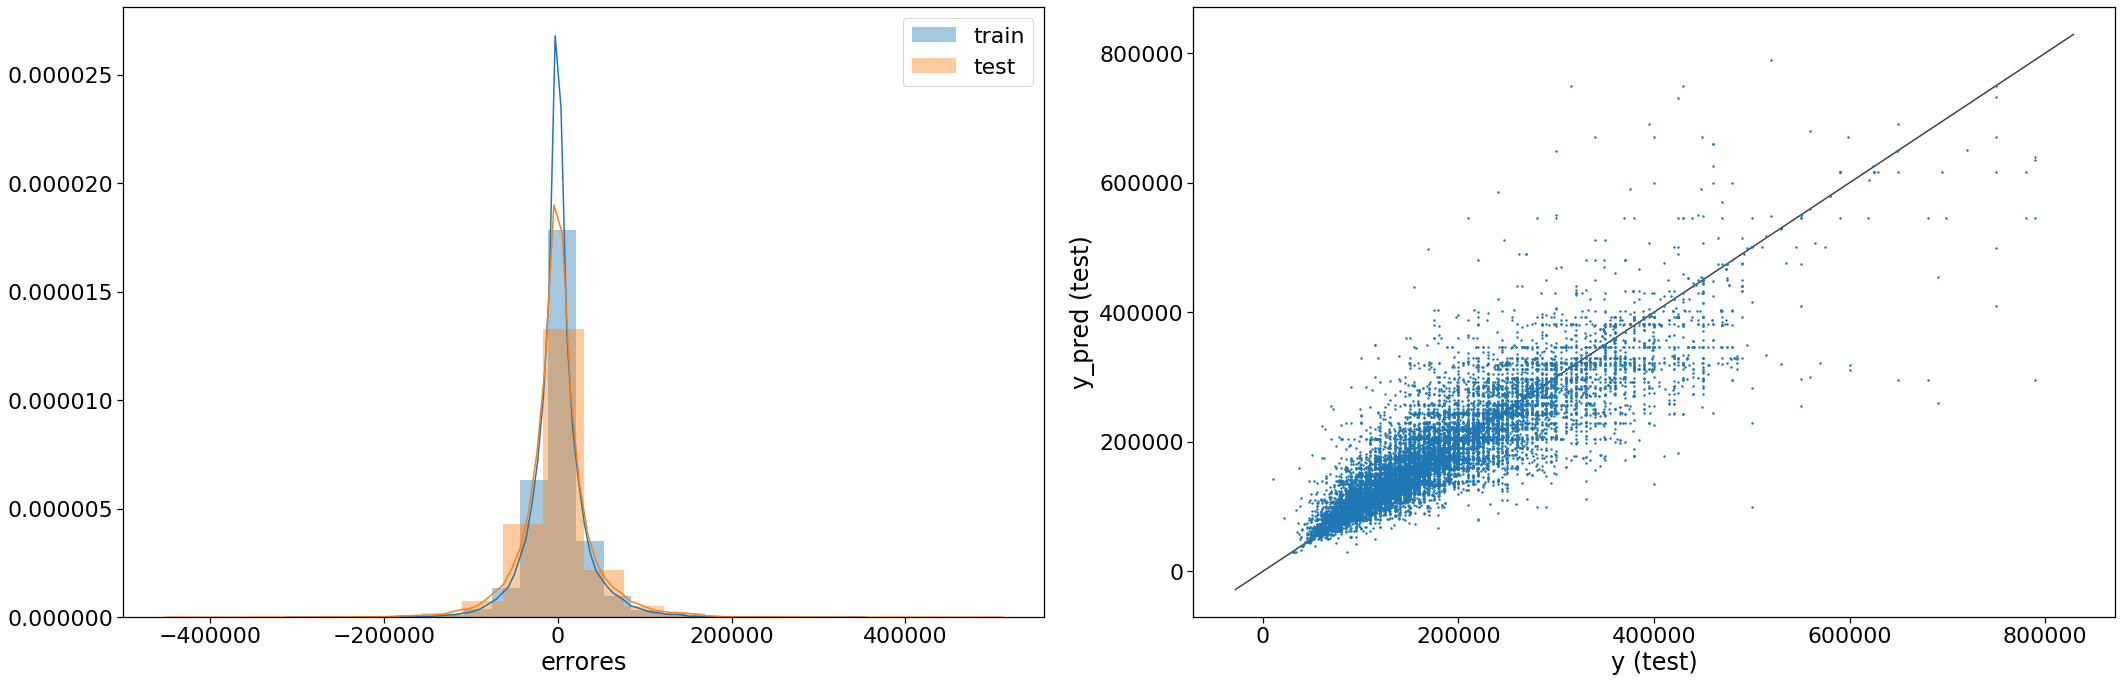

In [108]:
graphSquaredErrorRFR(tree_regressor_hyper_2,X2_train, X2_test, y_train, y_test)

Los modelos anteriores lucen con algo de  over-fitting por lo que seguire explorando tecnicas como GridSearchCV y RamdonSearchCV. Sin embargo tengo el presentimiento que al aplicar modelos de ensamble o modelos en conjunto los resultados serán los esperados, "La union hace la fuerza". Seguramente al bajar complejidad o profundidad "max_depth" el modelo bajara el overfitting pero en contrapartida bajará el rendimiento, por esa razón el conjunto puede bajar complejidad y bajar overfitting.

### DecisionTreeRegressor GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": np.arange(1,20,1),
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": np.arange(5,5000,500),
              }



grid_cv_dtm = GridSearchCV(tree_regressor_hyper_2, param_grid, cv=5)

grid_cv_dtm.fit(X2_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=13),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_leaf_nodes': array([   5,  505, 1005, 1505, 2005, 2505, 3005, 3505, 4005, 4505]),
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [110]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7670205703121008
Best Hyperparameters::
{'max_depth': 19, 'max_leaf_nodes': 3505, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [111]:
tree_regressor_hyper_3 = DecisionTreeRegressor(max_depth= 13, max_leaf_nodes= 2005, min_samples_leaf= 20, min_samples_split= 40)
tree_regressor_hyper_3.fit(X2_train, y_train)

DecisionTreeRegressor(max_depth=13, max_leaf_nodes=2005, min_samples_leaf=20,
                      min_samples_split=40)

Raíz del error cuadrático medio en Train: 38663.566074659415
Raíz del error cuadrático medio en Test: 41779.76101298418


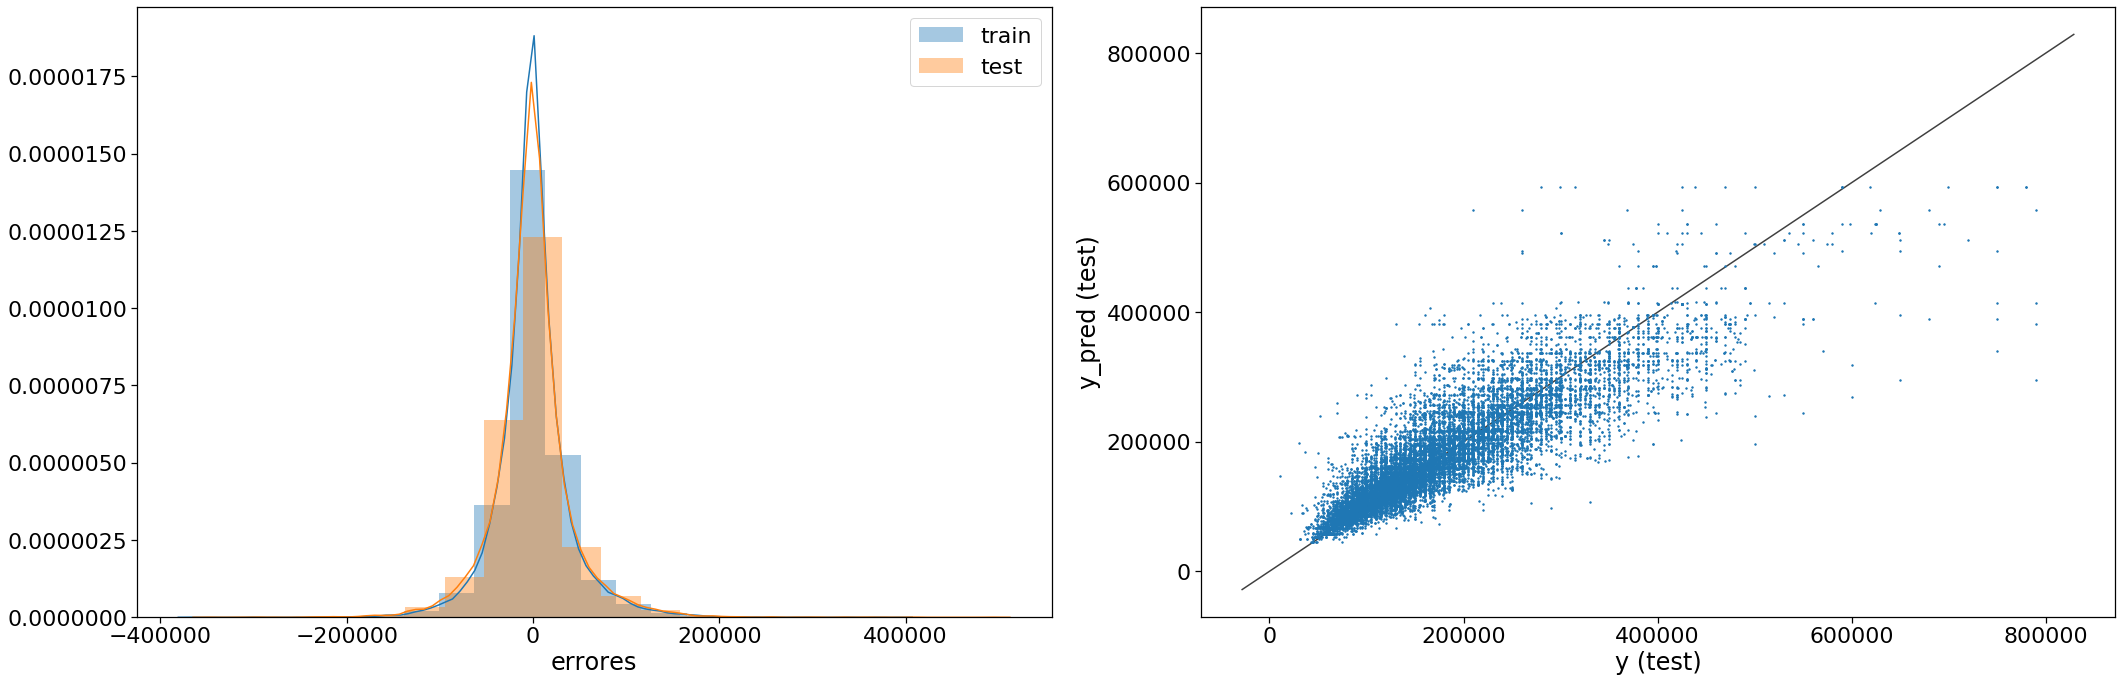

In [112]:
graphSquaredErrorRFR(tree_regressor_hyper_3,X2_train, X2_test, y_train, y_test)

El modelo anterior me dio más pobre resultado que el previo pero luce mejor en cuanto a overfitting, esto a razón que le baje un poco la prufundidad sugerida a 13 para tener menos complejidad y menos sobreajuste por ende, lo cual me lleva a tener menor rendimiento, pero ya con este modelo hemos practicamente igualado el mejor modelo del proyecto 1 y aun hay algunas técnicas mas que aplicar.

### RandomForestRegressor simple

Ahora ensayemos con otro de los modelos prometedores del proyecto uno el algoritmo RandomForestRegressor

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [115]:
forest_reg = RandomForestRegressor()

In [116]:
forest_reg.fit(X2_train, y_train)

RandomForestRegressor()

In [117]:
housing_predictions = forest_reg.predict(X2_train)

In [118]:
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17067.646644116823

In [119]:
forest_scores = cross_val_score(forest_reg, X2_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [120]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [32472.90256566 33157.69071349 33230.60197815 33615.03462556
 33615.15064814 34053.42343918 34814.81080372 34300.75895515
 34149.22276467 33564.71102878]
Mean: 33697.43075224954
Standard Deviation: 631.1324164713403


Raíz del error cuadrático medio en Train: 17067.646644116823
Raíz del error cuadrático medio en Test: 33527.752498089496


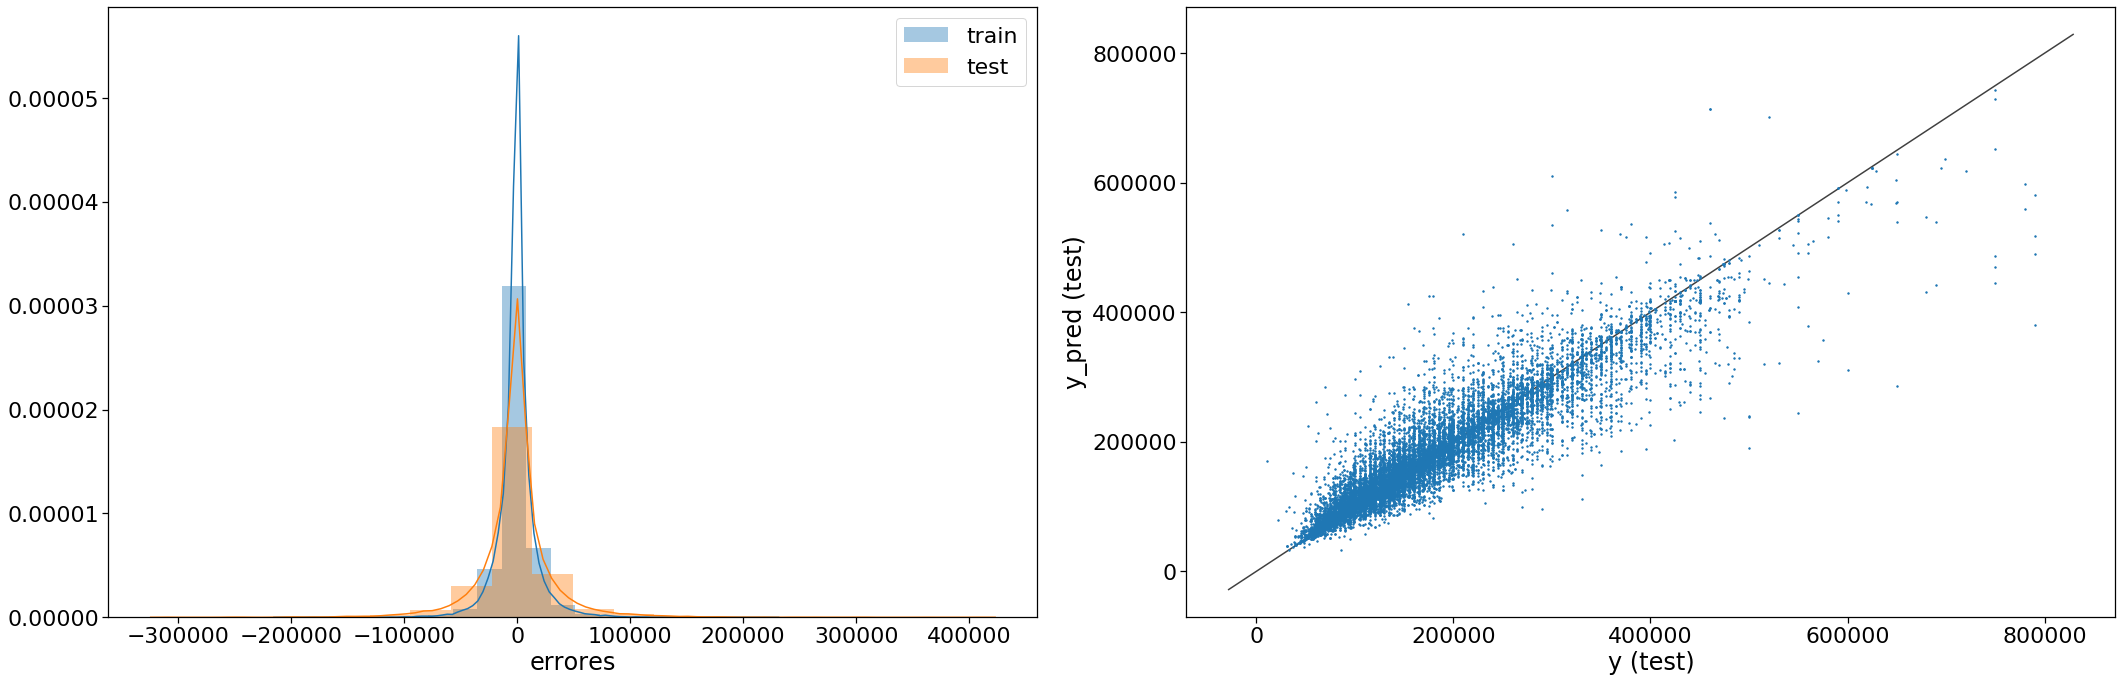

In [121]:
graphSquaredErrorRFR(forest_reg,X2_train, X2_test, y_train, y_test)

Luce con muy buenos resultados RandomForestRegressor se ven muy prometedores. Sin embargo, la puntuación en el conjunto de entrenamiento sigue siendo mucho más baja (el error es mucho menor) que en los conjuntos de validación (forest_rmse es la puntuación del conjunto de entrenamiento; forest_rmse_scores es la puntuación de los conjuntos de validación cruzada, la media). Esto significa que el modelo todavía está sobreajustando el conjunto de entrenamiento. Las posibles soluciones para el sobreajuste son simplificar el modelo, restringirlo (es decir, regularizarlo) u obtener muchos más datos de entrenamiento. Sin embargo, antes de profundizar mucho más en Random Forests, debería probar muchos otros modelos de varias categorías de algoritmos ML (varias máquinas de vectores de soporte con kernel diferente, posiblemente una red neuronal, etc.), sin perder demasiado tiempo ajustando los hiperparámetros. . El objetivo es preseleccionar algunos modelos prometedores (de dos a cinco).

#### Fine-Tune Your Model

Grid Search 
Es una de las maneras para optimizar mi modelo, Yo podría ir ajustando parametros manualmente en mi modelo hasta encontrar la mejor combinación, pero podria ser una labor tediosa. Para lo anterior Scikit-Learn nos ofrece GridSearchCV para hacer la busqueda por mi. Todo lo que necesita hacer es decirle con qué hiperparámetros desea que experimente y qué valores probar, y evaluará todas las combinaciones posibles de valores de hiperparámetro mediante validación cruzada. Por ejemplo, el siguiente código busca la mejor combinación de valores de hiperparámetros para RandomForestRegressor:

The hyperparameters: bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False

### RandomForestRegressor + GridSearchCV

In [122]:
from sklearn.model_selection import GridSearchCV


In [123]:
param_grid = [
    #{'n_estimators': [3,50,80], 'max_features': [2,4,8,10]},
    {'bootstrap':[False], 'n_estimators':[50,100,200], 'max_features': [2,4,6,8],
     'max_depth': [6,9,13], 'min_samples_split': [10, 20, 30]},
]

In [124]:
forest_reg = RandomForestRegressor()


In [125]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)


In [126]:
grid_search.fit(X2_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 19.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'bootstrap': [False], 'max_depth': [6, 9, 13],
                          'max_features': [2, 4, 6, 8],
                          'min_samples_split': [10, 20, 30],
                          'n_estimators': [50, 100, 200]}],
             scoring='neg_mean_squared_error', verbose=1)

Cuando no tiene idea de qué valor debería tener un hiperparámetro, un enfoque simple es probar potencias consecutivas de 10.

El param_grid le dice a Scikit-Learn que realice ásicamente es un entrenamiento iterativo en un conjunto conocido, lo anterior para obtener la mejor combinación de parametros, para este caso dado a que queremos bajar sobreajuste le he quitado complejidad al modelo colocando rangos bajos en el conjunto de parametros, por ejemplo aunque es posible que la mejor profundidad rodee los 19, le pondré maximo 13 ya que el error entre 13 y 19 no varia demasiado, así lograré que el modelo tenga buen rendimiento pero que a la ves no se forme tan complejo que lleve al sobreajuste, adicional a los parametros he optado por ejecución optima en paralelo (4 concurrent workers) de mi gridsearch para disminuir los tiempos de respuesta. 

In [127]:
grid_search.best_params_


{'bootstrap': False,
 'max_depth': 13,
 'max_features': 8,
 'min_samples_split': 10,
 'n_estimators': 200}

In [128]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, max_depth=13, max_features=8,
                      min_samples_split=10, n_estimators=200)

scores:

In [129]:
cvres = grid_search.cv_results_


In [130]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

51062.930185803234 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 50}
50961.60990633814 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 100}
51016.60978897673 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 200}
51127.951641203166 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 20, 'n_estimators': 50}
50995.49709390686 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 20, 'n_estimators': 100}
51017.25841370133 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 20, 'n_estimators': 200}
50971.784733474466 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 30, 'n_estimators': 50}
51092.8193525128 {'bootstrap': False, 'max_depth': 6, 'max_features': 2, 'min_samples_split': 30, 'n_estimators': 100}
51020.41464350118 {'bootstrap': False, 'm

Raíz del error cuadrático medio en Train: 30214.836016879683
Raíz del error cuadrático medio en Test: 37145.47247978665


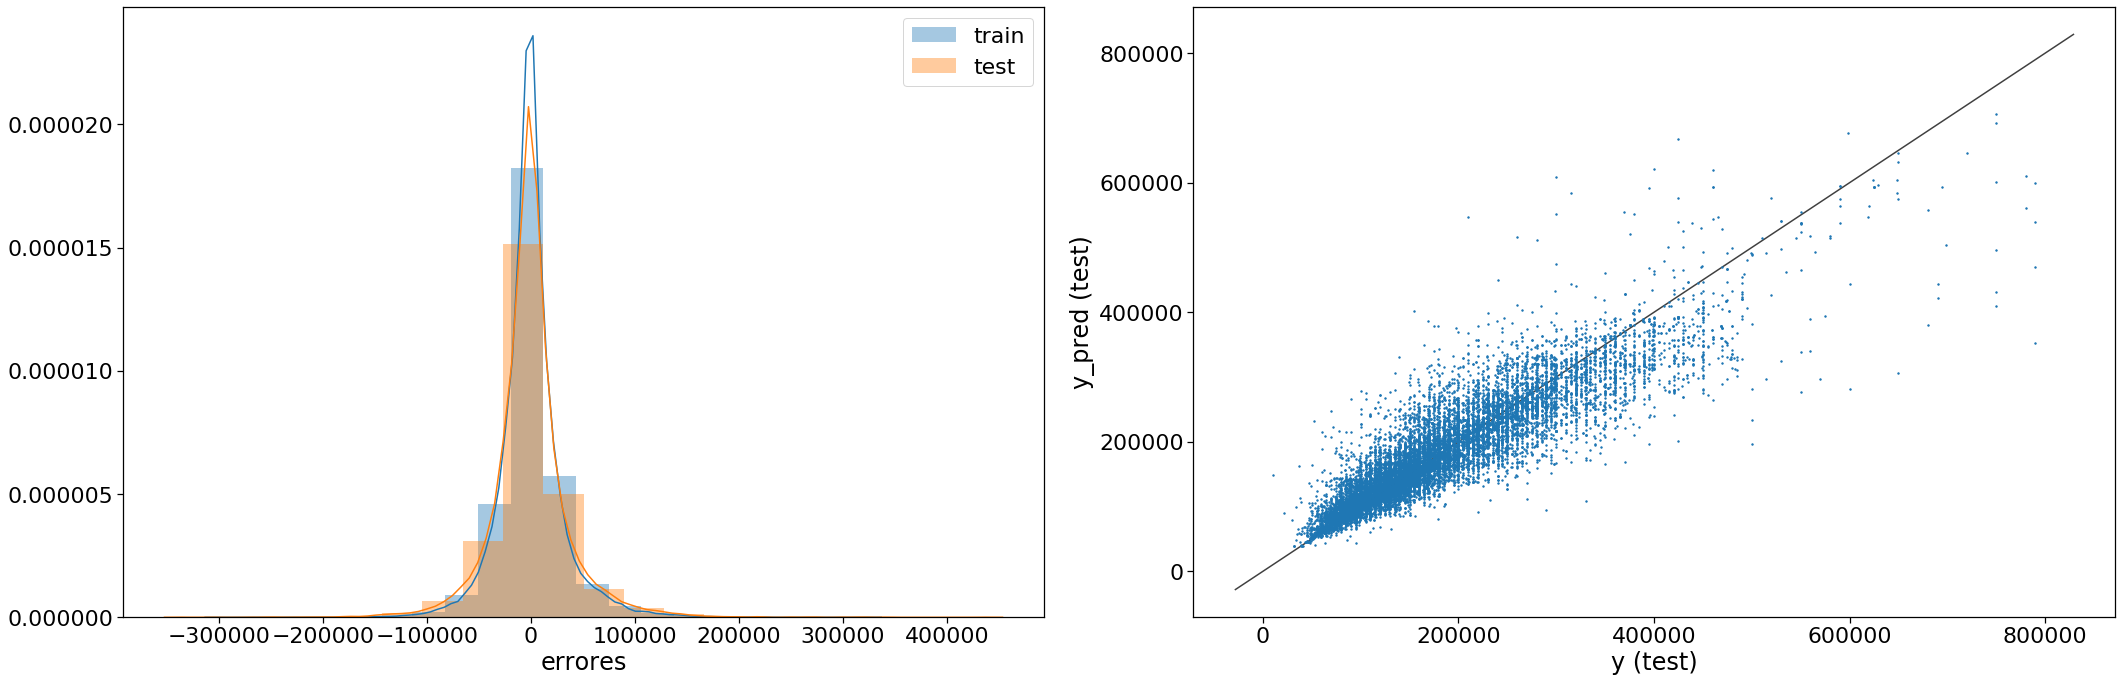

In [131]:
graphSquaredErrorRFR(grid_search,X2_train, X2_test, y_train, y_test)

Muy buen resultado, ya en este punto han sido mejorados los resultados del primer proyecto, le he bajado complejidad pero lo siento con algo de overfitting aun, probaré con RandomizedSearchCV ahora.

Randomized Search
El enfoque de búsqueda de cuadrícula está bien cuando está explorando relativamente pocas combinaciones, como en el ejemplo anterior, pero cuando el espacio de búsqueda de hiperparámetros es grande, a menudo es preferible usar RandomizedSearchCV en su lugar. Esta clase se puede usar de la misma manera que la clase GridSearchCV, pero en lugar de determinar todas las combinaciones posibles, evalúa un número determinado de combinaciones aleatorias seleccionando un valor aleatorio para cada hiperparámetro en cada iteración.

### RandomForestRegressor + RandomizedSearchCV

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [133]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
    'max_depth': randint(low=1, high=15),
    'min_samples_split': randint(low=1, high=30),
}

In [134]:
rnd_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error' )


In [135]:
rnd_search.fit(X2_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9275F7388>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9442E0688>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B9275F7208>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B943B29248>},
                   scoring='neg_mean_squared_error')

In [136]:
rnd_search.best_params_


{'max_depth': 14,
 'max_features': 6,
 'min_samples_split': 17,
 'n_estimators': 171}

In [137]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

53318.631409122034 {'max_depth': 4, 'max_features': 4, 'min_samples_split': 9, 'n_estimators': 177}
54374.074947942136 {'max_depth': 4, 'max_features': 2, 'min_samples_split': 26, 'n_estimators': 195}
47147.906467428074 {'max_depth': 8, 'max_features': 4, 'min_samples_split': 18, 'n_estimators': 95}
38049.05792842933 {'max_depth': 14, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 185}
50385.935341985576 {'max_depth': 6, 'max_features': 3, 'min_samples_split': 15, 'n_estimators': 133}
60937.01797426257 {'max_depth': 2, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 57}
42772.54001400625 {'max_depth': 11, 'max_features': 4, 'min_samples_split': 19, 'n_estimators': 168}
38044.391358344044 {'max_depth': 14, 'max_features': 6, 'min_samples_split': 17, 'n_estimators': 171}
58362.07839614285 {'max_depth': 2, 'max_features': 4, 'min_samples_split': 7, 'n_estimators': 93}
48178.59541514017 {'max_depth': 7, 'max_features': 6, 'min_samples_split': 18, 'n_estimators': 61}


Raíz del error cuadrático medio en Train: 32502.188723728217
Raíz del error cuadrático medio en Test: 37688.65037335721


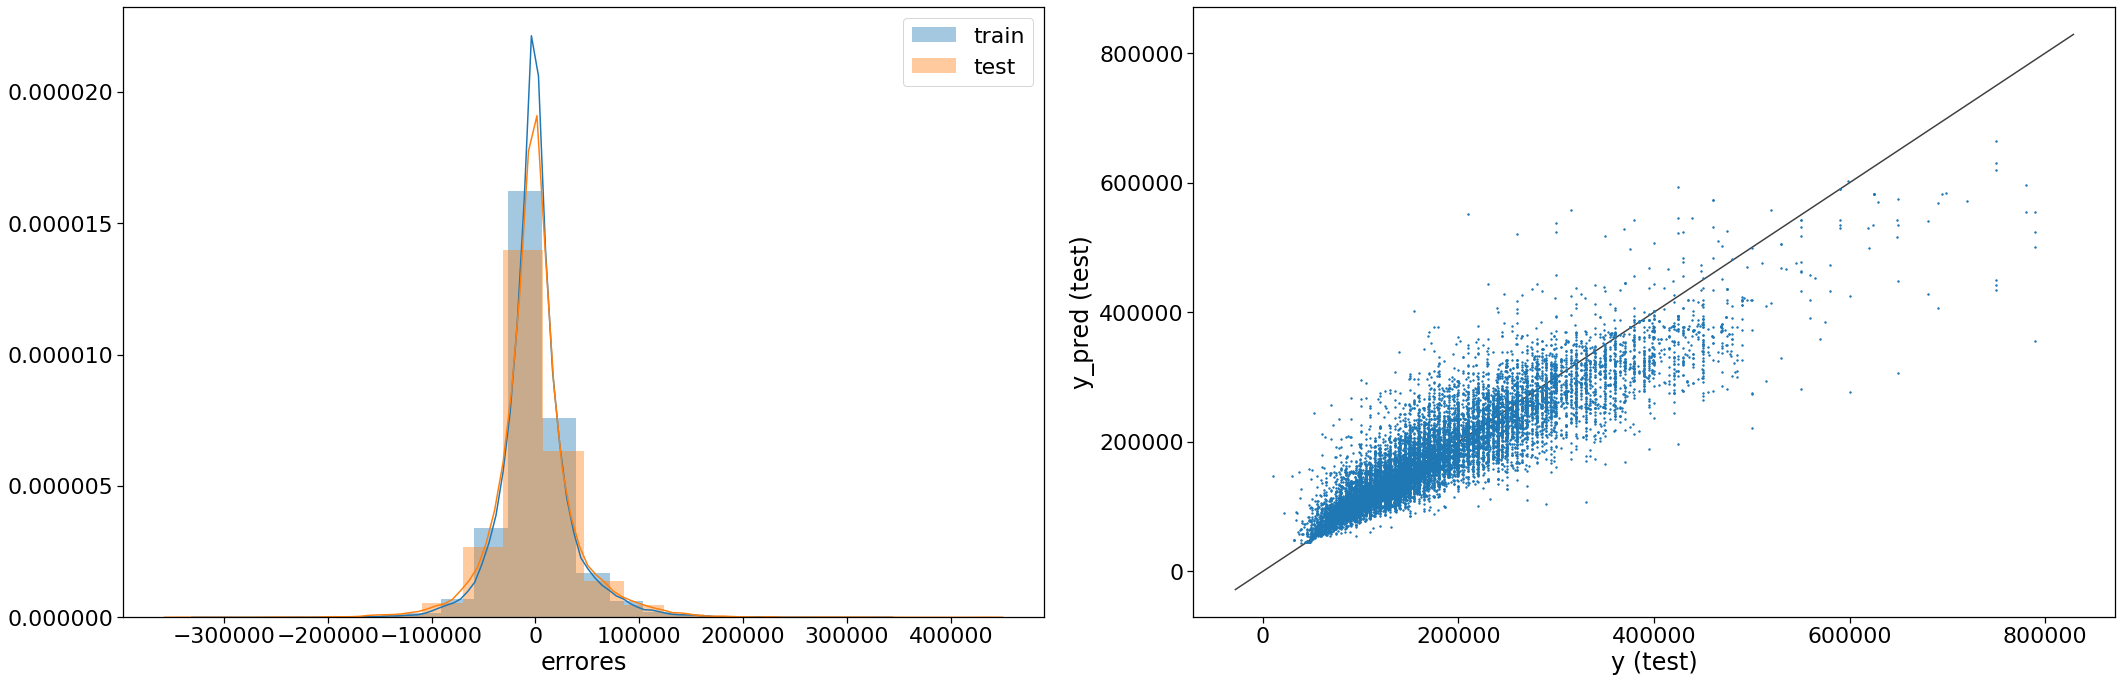

In [138]:
graphSquaredErrorRFR(rnd_search,X2_train, X2_test, y_train, y_test)

Muy buen resultado, observo que aleatoriamente logro encontrar una buena combinación, quizas no la mejor pero una muy buena en la que no generó un modelo complejo por lo que el overfitting bajo. Y a este punto ya también superó el mejor esultado del proyecto 1, lo que me lleva a concluir que las técnicas avanzadas son de gran utilidad y que a la ves hay que ir jugando con los parametros gasta lograr un buen equilibrio.


### Feature importances

Un punto importante es conocer la importancia que tiene en el modelo cada uno de nuestros atributos predictores, así podemos quizas simplificar el modelo sin quitar score o mejorar los tiempos de respuesta, o de igual forma darnos cuenta que tenemos una buena combinación de atributos y la significancia de su aporte.

In [139]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X2_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_depth': [6, 9, 13],
                          'max_features': [2, 4, 6, 8],
                          'min_samples_split': [10, 20, 30],
                          'n_estimators': [50, 100, 200]}],
             scoring='neg_mean_squared_error')

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [141]:
feature_importances

array([0.0135392 , 0.22096986, 0.00648171, 0.06671565, 0.51533722,
       0.01157456, 0.15144577, 0.00140068, 0.00610112, 0.00643422])

Vamos a mostrar estas puntuaciones de importancia junto a sus correspondientes nombres de atributos:

In [142]:
sorted(zip(feature_importances, X2_train.columns), reverse=True)


[(0.5153372230178871, 'surface_covered'),
 (0.22096986187003442, 'surface_total'),
 (0.1514457743773321, 'location_code'),
 (0.06671564553053398, 'bathrooms'),
 (0.01353919619486228, 'rooms'),
 (0.011574561712717375, 'bedrooms'),
 (0.006481714024059816, 'property_type_code'),
 (0.006434223150864172, 'type_PH'),
 (0.006101120490056857, 'type_Departamento'),
 (0.0014006796316518959, 'type_Casa')]

Con esta información, es posible que desee eliminar algunas de las funciones menos útiles. Para nuestro caso creo que tenemos las más importantes aunque no todas con igual nivel de importancia, el resultado es muy coherente con los analisis de correlaciones previos.

Luego de hacer el analisis de variables observé que estas son mis variables más relevantes en la predicción:
[(0.5222087894204169, 'surface_covered'),
 (0.21592682091899068, 'surface_total'),
 (0.1514285238218684, 'location_code'),
 (0.06487337921493307, 'bathrooms'),
 (0.013351221830214883, 'rooms'),
 (0.011720401662824932, 'bedrooms'),
 (0.00685112985810104, 'property_type_code'),
 (0.0064743569882489554, 'type_Departamento'),
 (0.006026671678910367, 'type_PH'),
 (0.0011387046054907209, 'type_Casa')]
 
 Se observa que el tipo de propiedad no ha sido tan relevante como en un principio se hubiese pensado.

### Bagging y Boosting

bagging y boosting son muy populares en Machine Learning. En competiciones online como Kaggle son de los que han demostrado ofrecer mejores resultados. Entre los métodos de aprendizaje automático más usados se encuentran el XGBoost, el Random Forest o el AdaBoost. Todos estos algoritmos de aprendizaje automático tienen algo en común, son algoritmos que se denominan ensamblados.

¿En qué consisten los algoritmos ensamblados? De manera sencilla podría decirse que son algoritmos formados por algoritmos más simples. Estos algoritmos simples se unen para formar un algoritmo más potente. Como bien dicen «La unión hace la fuerza«, y lo demuestran los algoritmos ensamblados.

Aunque hay diversas formas de ensamblar o unir algoritmos débiles para formar otros, las más usadas y populares son el bagging y el boosting (aunque existen otras como el stacking). Cada tipo de algoritmo tiene unas ventajas y unos inconvenientes y pueden ser usados convenientemente según nuestra problemática.

#### Bagging

Los métodos de bagging son métodos donde los algoritmos simples son usados en paralelo. El principal objetivo de los métodos en paralelo es el de aprovecharse de la independencia que hay entre los algoritmos simples, ya que el error se puede reducir bastante al promediar las salidas de los modelos simples. Es como si, queriendo resolver un problema entre varias personas independientes unas de otras,  damos por bueno lo que eligiese la mayoría de las personas.

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [144]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=42)

### Decisiontree Regressor,BaggingRegressor

In [145]:
#Decisiontree Regressor,BaggingRegressor
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=13), n_estimators=200,
                         bootstrap=True, 
                         bootstrap_features=False, oob_score=True, random_state=2, 
                         verbose=1,n_jobs=-1).fit(X2_train, y_train)
test_score=model.score(X2_test,y_test)
train_score=model.score(X2_train,y_train)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   10.7s remaining:   10.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.2s finished


In [146]:
train_score

0.88926834387599

In [147]:
test_score

0.8267970927135201

_Cross validation se utiliza para el rendimiento del modelo en datos no vistos



In [148]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X2,y,cv=2)
score

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    6.0s remaining:    6.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.7s finished


array([0.81600341, 0.81322963])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished


Raíz del error cuadrático medio en Train: 28920.00471061622
Raíz del error cuadrático medio en Test: 36173.876196084195


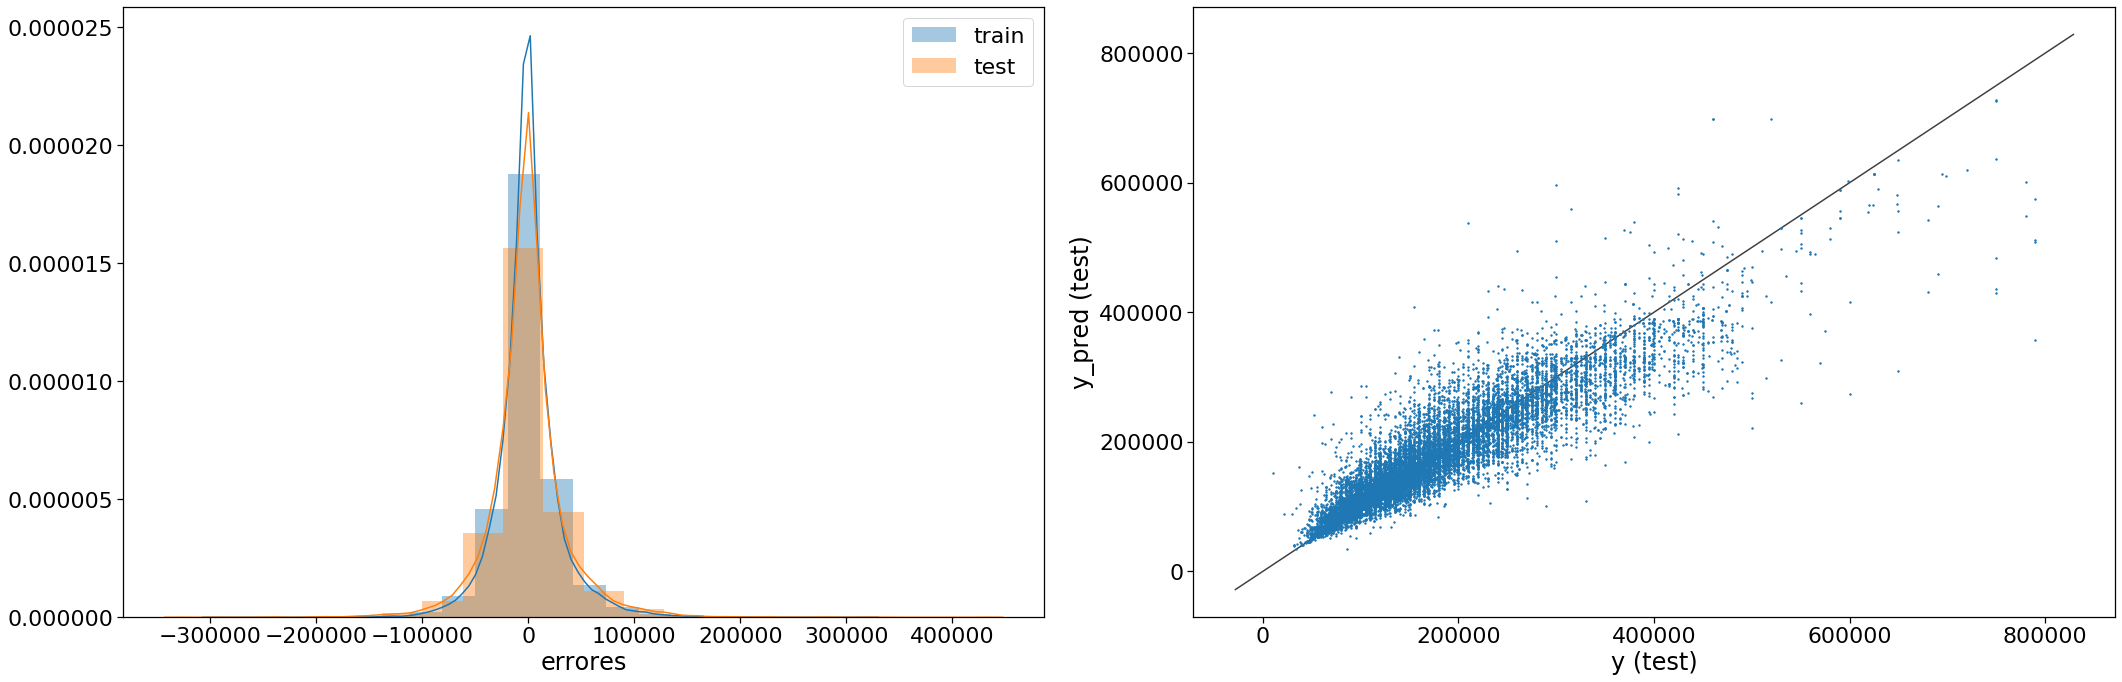

In [149]:
graphSquaredErrorRFR(model,X2_train, X2_test, y_train, y_test)

Se observa que usando modelos ensamblados los resultados son muy buenos y hay algo que resalto y es la velocidad de ejecución en paralelo dado que en mis primeros ensayos use parametro con solo un trabajo concurrente y luego al pasarlo a -1 la velocidad mejoró considerablemente. Sobre los modelos ensamblados para este caso observo que cumplen con su cometido y es lograr un buen rendimiento pero si dejar exceder el overfitting. Seguire ensayando con modelos de ensable que son muy usados en la actualidad y creo son los que encajarán a la perfección con mi modelo pedictor buscado.

###  Boosting XGBRegressor

In [150]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [151]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 10, 15],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X2_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.3min finished


[14:02:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.8579524293502345
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 15, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [152]:
# fit model no training data
model_hyperXGB = XGBRegressor( colsample_bytree= 0.7, learning_rate= 0.07, 
                           max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, 
                           objective= 'reg:linear', silent= 1, subsample=0.7)
model_hyperXGB.fit(X2_train, y_train)

[14:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

Raíz del error cuadrático medio en Train: 29373.245636867323
Raíz del error cuadrático medio en Test: 34991.317339140194


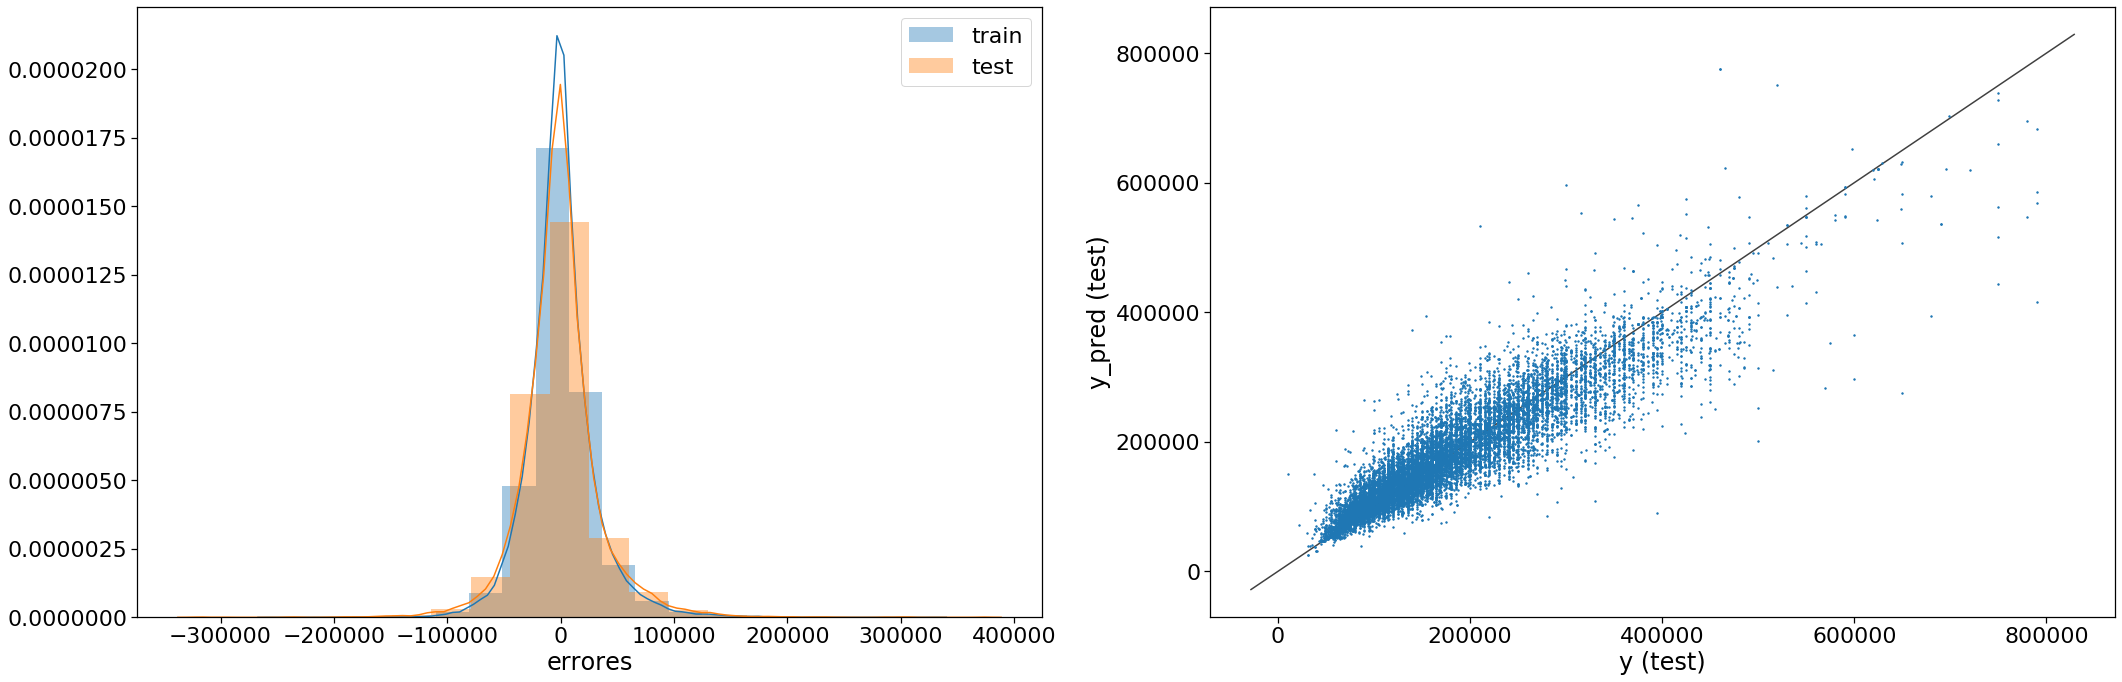

In [153]:
graphSquaredErrorRFR(model_hyperXGB,X2_train, X2_test, y_train, y_test)

### Ranking Resultados Modelos descritos previamente

#### Mejor modelo proyecto 1

##### DecisionTreeRegressor(max_depth= 14, max_leaf_nodes= 2505, min_samples_leaf= 20, min_samples_split= 20)
Raíz del error cuadrático medio en Train: 38853.69
Raíz del error cuadrático medio en Test: 39948.21


#### Ranking modelos proyecto 2

##### 1. Boosting XGBRegressor
Raíz del error cuadrático medio en Train: 29373.24
Raíz del error cuadrático medio en Test: 34991.31
Variación entre conjuntos: 5618.07
##### 2. DecisionTreeRegressor GridSearchCV
Raíz del error cuadrático medio en Train: 38663.56
Raíz del error cuadrático medio en Test: 41779.55
Variación entre conjuntos:    3115.99
##### 3. RandomForestRegressor + RandomizedSearchCV
Raíz del error cuadrático medio en Train: 37010.92
Raíz del error cuadrático medio en Test: 40783.65
Variación entre conjuntos: 3772.73
##### 4. Decisiontree Regressor,BaggingRegressor
Raíz del error cuadrático medio en Train: 28920.00
Raíz del error cuadrático medio en Test: 36173.87
Variación entre conjuntos: 7253.87
##### 5. RandomForestRegressor + GridSearchCV
Raíz del error cuadrático medio en Train: 30349.63
Raíz del error cuadrático medio en Test: 37177.52
Variación entre conjuntos: 6827.89
##### 6. DecisionTreeRegressor(max_depth= 13) navaja de ockham
Raíz del error cuadrático medio en Train: 31856.98
Raíz del error cuadrático medio en Test: 41261.54
Variación entre conjuntos:    9404.56
##### 7. DecisionTreeRegressor(max_depth=3, random_state=42)
Raíz del error cuadrático medio en Train: 56810.96
Raíz del error cuadrático medio en Test: 57220.08
Variación entre conjuntos: 409.12
##### 8. Linear Regression
Raíz del error cuadrático medio en Train: 55942.74
Raíz del error cuadrático medio en Test: 56041.78
Variación entre conjuntos: 99.04
##### 9. Ridge(L2) Regression
Raíz del error cuadrático medio en Train: 55942.74
Raíz del error cuadrático medio en Test: 56041.90
Variación entre conjuntos: 99.16
##### 10. Lasso(L1) Regression
Raíz del error cuadrático medio en Train: 55942.74
Raíz del error cuadrático medio en Test: 56041.73
Variación entre conjuntos: 98.99
##### 11. RandomForestRegressor Simple
Raíz del error cuadrático medio en Train: 17084.33
Raíz del error cuadrático medio en Test: 33567.79
Variación entre conjuntos: 16483.46
##### 12. DecisionTreeRegressor con Hyperparametro max_depth
Raíz del error cuadrático medio en Train: 17626.16
Raíz del error cuadrático medio en Test: 39982.10
Variación entre conjuntos: 22355.94


### ¿Coincide con lo que esperabas a partir de tu experiencia con este dataset?

Con el preprocesamiento y modelado realizado con el proyecto 1 los resultados fueron muy satisfactorios. Al iniciar los modelos con el proyecto dos los resultados no fueron muy alentadores, en principio creo que debido a que aca tomamos el riesgo de hacer la imputación de valores faltantes lo cual al principio no dio buenos resultados pero en la medida que iva aplicando tecnicas un poco más trabajadas los resultados fueron mejorando. Luego al aplicar técnicas avanzadas como GridSearch, RandomSearch, Bagging, Boosting, Regularization, entre muchas otras los resultados fueron siendo cada ves mejores como se puede observar en el ranking superior, al punto de mejorar los resultados del proyecto 1 usando Boosting XGBRegressor que es un modelo muy aplicado en la actualidad y sobre todo muy optimo en temas de rendimiento. Cabe resaltar que hubieron modelos con mejor rendimiento en el set de train pero al evaluarlo con los datos de test los resultados no fueron muy alentadores lo que evidencio un sobreajuste.

Al final los resultados fueron los esperados, al principio al usar regresión lineal pude observar que los resultados no fueron buenos, lo anterior quizás a que mis datos o algunas de mis variables no tienen un comportamiento línea. En la medida que avanzaba me di cuenta que los arboles de decisión dieron mejores resultados. Sin embargo los resultados en el conjunto de pruebas aunque no es malo es muy distante del resultado de entrenamiento, es decir se comenzó a evidenciar algo de overfitting pero entendí que este era por la complejidad dada la profundidad de los arboles, hay observe que ese era el camino solo que debía bajar complejidad sin perder rendimiento, dado lo anterior comencé a pensar en los modelos de ensamble que ayudan a encontrar un buen rendimiento y a manejan el overfitting ya que generalizan los resultados.

Al hacer el tuning del árbol observé que luego de profundidad 13 el error en test es similar, por ende utilizando el principio de parsimonia o navaja de ockham seleccioné el modelo con max_depth igual a 13, Las técnicas  GridSearchCV y RamdonSearchCV me fueron de suma utilidad al poder hallar los mejores parámetros pero sabiendo cual es el rango de valores que me evitan overfitting, los asigne a mi grid dando unos muy buenos resultados. Sin embargo tengo el presentimiento que al aplicar modelos de ensamble o modelos en conjunto los resultados serán los esperados, "La union hace la fuerza".  Adicional a los parámetros he optado por ejecución optima en paralelo ( concurrent workers) de mi gridsearch para disminuir los tiempos de respuesta. Un punto adicional que ayudo a las mejoras en el modelo fue el análisis de importancia de mis variables o features, al principio había dejado unas importantes por fuera y había incluido algunas que no tenían mayor impacto en los resultados de mi modelo. Finalmente mis mejores resultados se observan con los modelos ensamblados y hay algo que resalto y es la velocidad de ejecución en paralelo dado que en mis primeros ensayos use parámetro con solo un trabajo concurrente y luego al pasarlo a -1 la velocidad mejoró considerablemente. Sobre los modelos ensamblados para este caso observo que cumplen con su cometido y es lograr un buen rendimiento pero si dejar exceder el overfitting. 


### DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [154]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [155]:
df_v_cl = df_v3[['bedrooms','rooms','surface_covered','bathrooms','surface_total','price','property_type','title']]

In [156]:
print(df_v_cl.groupby('property_type').size())

property_type
Casa             1850
Departamento    54893
PH               6863
dtype: int64


<Figure size 2160x3600 with 0 Axes>

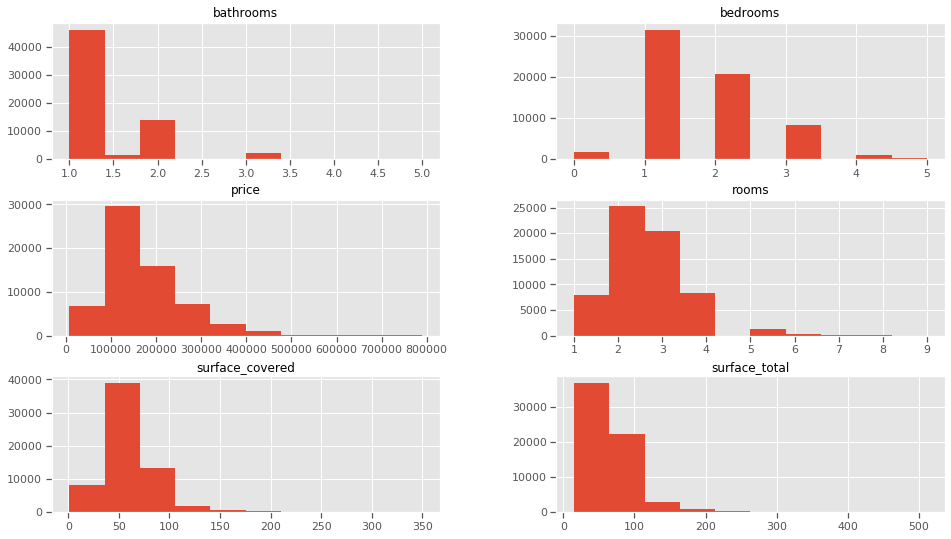

In [157]:
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(30,50))
df_v_cl.drop(['property_type'],1).hist()
plt.show()

In [158]:
df_v_cl.describe()

,bedrooms,rooms,surface_covered,bathrooms,surface_total,price
count,63606.000000,63606.000000,63606.000000,63606.000000,63606.000000,63606.000000
mean,1.613936,2.543974,60.191097,1.299218,68.498182,172094.241880
std,0.814400,0.984388,30.460121,0.526990,40.780983,86912.616582
min,0.000000,1.000000,1.000000,1.000000,15.000000,7500.000000
25%,1.000000,2.000000,40.715138,1.000000,44.000000,110000.000000
50%,1.000000,2.000000,52.000000,1.000000,58.000000,150000.000000
75%,2.000000,3.000000,72.000000,2.000000,81.000000,215000.000000
max,5.000000,9.000000,350.000000,5.000000,511.000000,790000.000000


F:\Anaconda3\envs\datascience\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


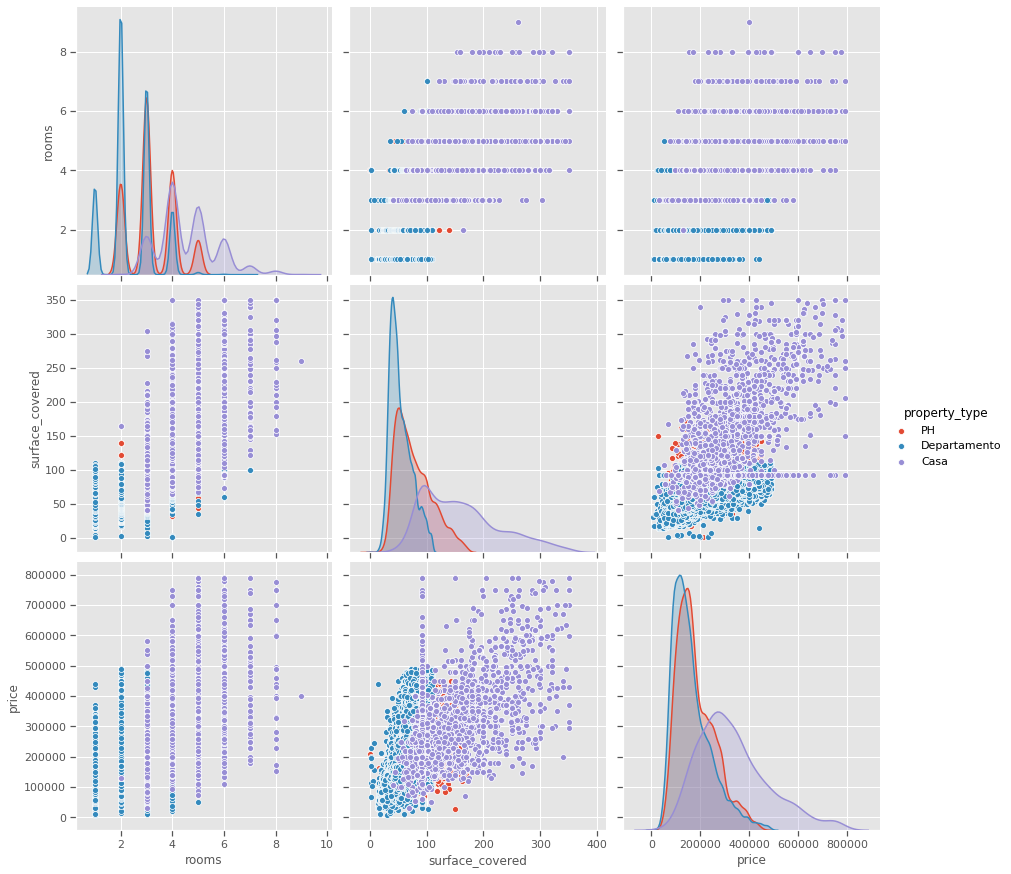

In [159]:
sb.pairplot(df_v_cl.dropna(), hue='property_type',size=4,vars=["rooms","surface_covered","price"],kind='scatter')

In [160]:
X = np.array(df_v_cl[["rooms","surface_covered","price"]])
y = np.array(df_v_cl['property_type'])
X.shape

(63606, 3)

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo”. Este es nuestro resultado:

In [161]:
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

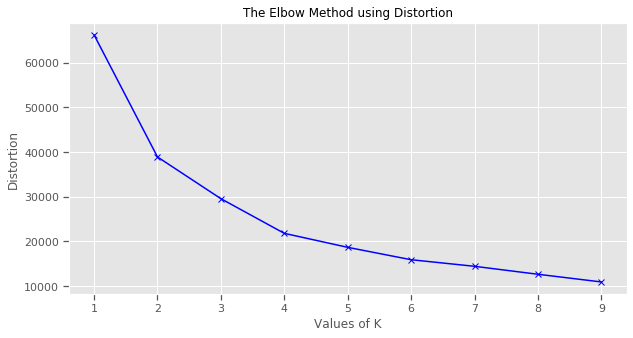

In [162]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

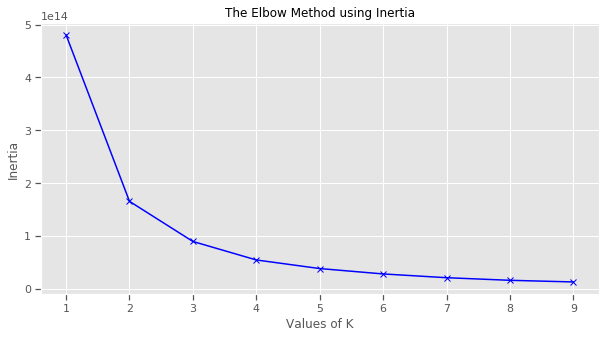

In [163]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Para determinar el número óptimo de grupos, tenemos que seleccionar el valor de k en el "codo", es decir, el punto después del cual la distorsión / inercia comienza a disminuir de manera lineal.

Ejecutamos el algoritmo para 3 clusters y obtenemos las etiquetas y los centroids.

In [164]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.14447758e+00 4.68377641e+01 1.18416514e+05]
 [3.07173743e+00 7.46251424e+01 2.25847086e+05]
 [3.61389961e+00 1.07836489e+02 3.79438858e+05]]


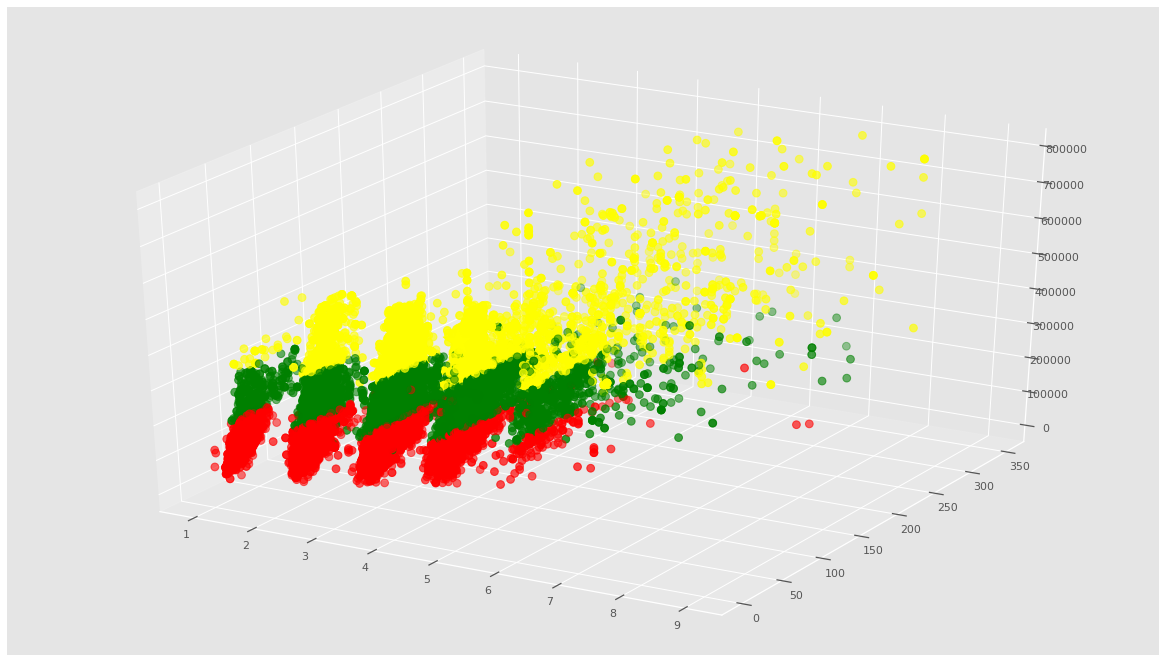

In [165]:

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

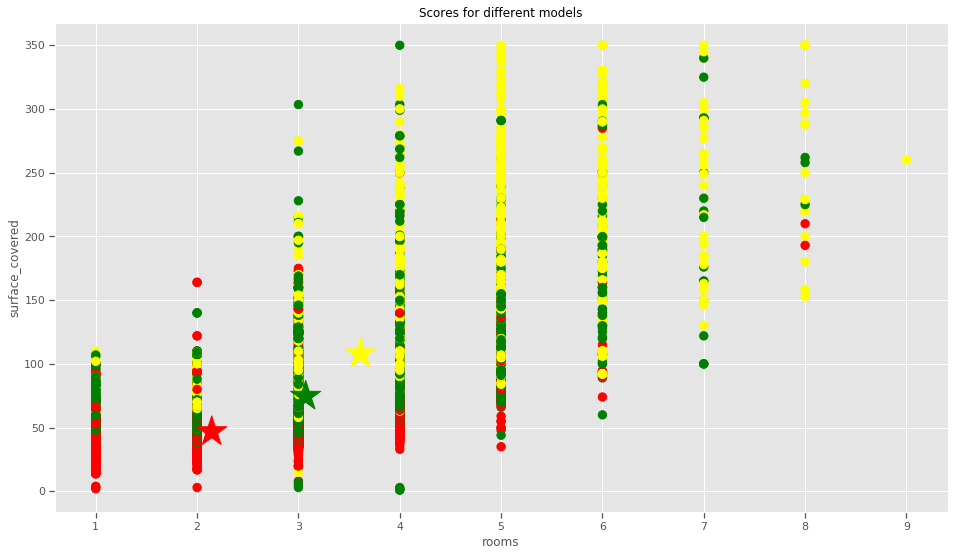

In [166]:
# Getting the values and plotting it
f1 = df_v_cl['rooms'].values
f2 = df_v_cl['surface_covered'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Scores for different models')
plt.xlabel('rooms')
plt.ylabel('surface_covered')
plt.show()

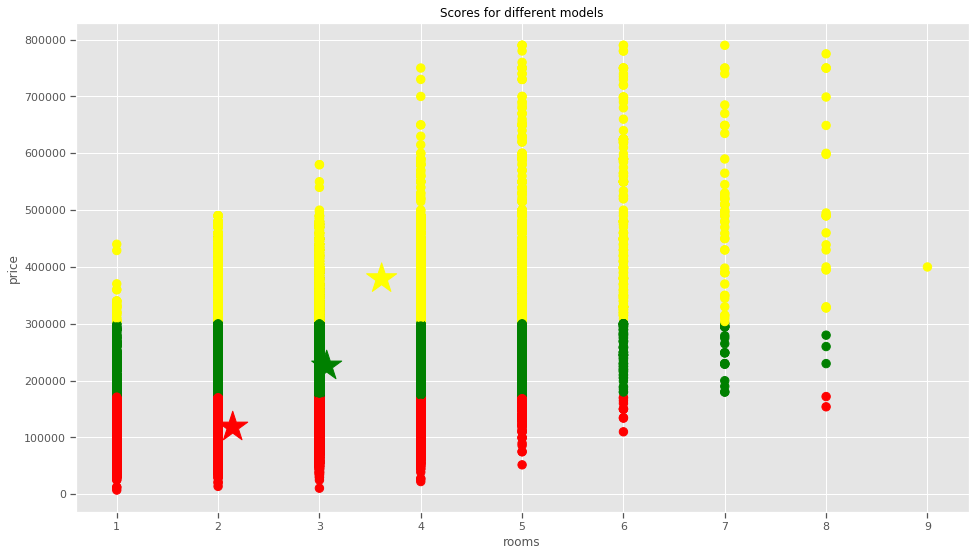

In [167]:
# Getting the values and plotting it
f1 = df_v_cl['rooms'].values
f2 = df_v_cl['price'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Scores for different models')
plt.xlabel('rooms')
plt.ylabel('price')
plt.show()

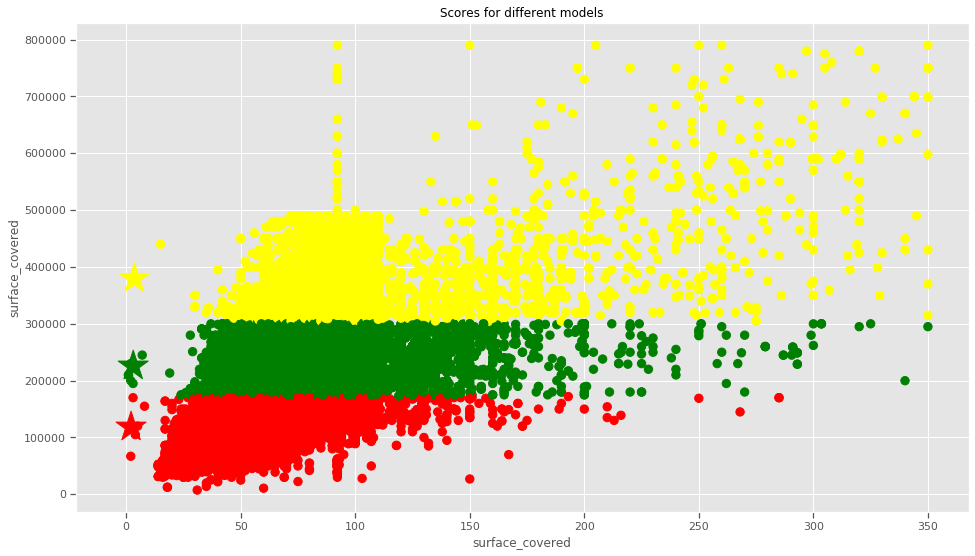

In [168]:
# Getting the values and plotting it
f1 = df_v_cl['surface_covered'].values
f2 = df_v_cl['price'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Scores for different models')
plt.xlabel('surface_covered')
plt.ylabel('surface_covered')
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [169]:
copy =  pd.DataFrame()
copy['title']=df_v_cl['title'].values
copy['property_type']=df_v_cl['property_type'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,39214
1,green,19211
2,yellow,5181


Buscaremos las propiedades que están más cerca a los centroids de cada grupo que podríamos decir que tienen las caracteristicas que representan a cada cluster:

In [170]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([56881, 29688, 28248], dtype=int64)

In [171]:
propiedades=df_v_cl['title'].values
for row in closest:
    print(propiedades[row])

Excelente Monoambiente amoblado en Recoleta Barrio Norte 
A ESTRENAR - MONROE Y MELIAN - VISTA ABIERTA - M/LUM
Venta Departamento 3 ambientes amenities cochera


In [172]:
categorias=df_v_cl['property_type'].values
for row in closest:
    if(categorias[row]!=None):
        print(categorias[row])

Departamento
Departamento
Departamento


#### Silhouette
Vamos a evaluar las particiones que realizamos mediante el valor de silhouette. La idea es que al variar los parámetros de los modelos de clustering, cambiará la distribución del valor de Silhouettes en los datos. Con esa distribución debemos elegir los mejores parametros posibles.

Primero vamos a calcular únicamente el valor de silhouette promedio para distintos valores de K. La manera de hacerlo es igual a la que usamos para calcular los valores de distancia media, vamos a recorrer con un for los distintos modelos e ir agregando a una lista los valores. Esta vez, en lugar de calcular la distancia, vamos a calcular el valor de silhouette usando la función silhouette_score.

In [173]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [174]:
def calcSilhouette(toClusters,xDataset):
    # Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
    lista_sil = []
    K = range(2,toClusters)
    # Fiteammos un modelo para cada numero de cluster que queremos testear
    for k in range(2,toClusters):
        # Definimos y entrenamos el modelo
        km = KMeans(n_clusters=k)
        km = km.fit(xDataset)
    
        # Tomamos las etiquetas
        etiquetas = km.labels_
    
        # Calculamos el silhouette 
        valor_medio_sil = silhouette_score(xDataset, etiquetas)
        lista_sil.append(valor_medio_sil)
    
    plt.figure(figsize = (10,7))
    plt.plot(K, lista_sil, lw=3)
    plt.scatter(K, lista_sil,s=55,c='r')
    plt.xlabel('Cantidad de Clusters K')
    plt.ylabel('Silhouette media')
    plt.title('Silhouette media para el Dataset')

    plt.show()

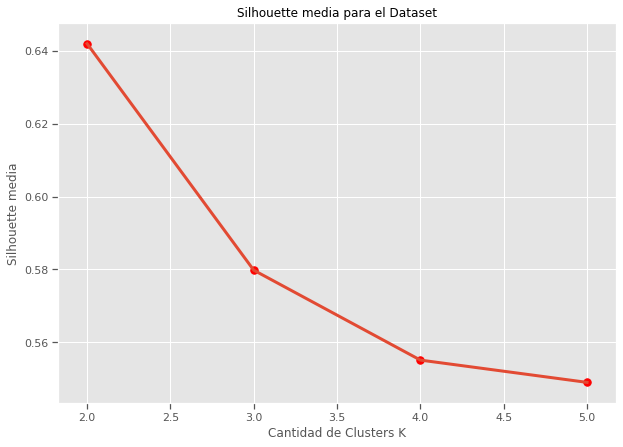

In [175]:
calcSilhouette(6,df_v3[['bedrooms','rooms','surface_covered','bathrooms','surface_total','price']])

Luego de hacer el ejercicio se observa que hay una clara separación de grupos, en principio pense que esta correspondería directamente con el tipo de propiedad pero no fue así como pudimos observar en la última parte donde los tres centroides igual correspondian al tipo Departamento. Sin embargo, si se observa que en cuanto a superficie, precio y número de cuartos sus valores tienden a estar super correlacionados y dicha correlación hace que se formen tres grupos definidos en los que el precio, el número de habitaciones y la superficie son directamente proporcionales. Muy chevere el ejercicio, quizas se pudiera pensar en llevar estos tres atributos a uno solo tratando de reducir dimensionalidad al modelo, sin embargo dado a que no tenemos un dataset con tantas propiedades puede que no sea necesario, pero si es un ejercicio valioso quizas para futuros trabajos.

Con lo anterior concluyo, este fue un ejercicio demasiado enriquecedor, lleno realmente de muchos temas pero que ayudan a formar una gran base para enfrentarnos al mundo laboral.